In [32]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from DataSynthesizer.datatypes.utils.DataType import DataType
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [2]:
mergedData = pd.read_excel('TabellaFinale.xlsx', sheet_name=None)

In [3]:
mergedData['Sheet1'].head()

Unnamed: 0  HDN_CODE Sesso  ETA                DATA  ASCVD_Score  DATA_INT  \
0           7      2236     M   64 2021-02-26 00:00:00        27.30       422   
1           6      6426     M   47 2021-04-02 00:00:00         2.56       457   
2          18      8377     M   56 2020-08-31 00:00:00         7.80       243   
3          51     11463     M   71 2020-08-31 00:00:00        24.74       243   
4          53     11463     M   71 2021-03-31 10:54:33          NaN       456   

   num_visita  Charlson_Totale Charlson_Diabete  ...  DASS21 stress  \
0           0              NaN              NaN  ...            0.0   
1           0              2.0           0 = No  ...            3.0   
2           0              1.0           0 = No  ...            NaN   
3           0              3.0           0 = No  ...            NaN   
4           1              NaN              NaN  ...            0.0   

   Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0        Normal             0.0         Normal                0.0   
1        Normal             4.0           Mild                7.0   
2           NaN             NaN            NaN                NaN   
3           NaN             NaN            NaN                NaN   
4        Normal             0.0         Normal                0.0   

   Depression level  Insomnia severity index  \
0            Normal                      8.0   
1          Moderate                      6.0   
2               NaN                      NaN   
3               NaN                      NaN   
4            Normal                      0.0   

                            ISI level  SF36 general health Resilience  
0               Subthreshold Insomnia                 75.0       64.0  
1  No Clinically Significant Insomnia                 10.0       54.0  
2                                 NaN                  NaN        NaN  
3                                 NaN                  NaN        NaN  
4  No Clinically Significant Insomnia                 90.0       88.0  

[5 rows x 80 columns]

In [4]:
# tolgo la prima colonna e seleziono il primo foglio
df = mergedData['Sheet1'].iloc[:, 1:]

In [5]:
df.head()

HDN_CODE Sesso  ETA                DATA  ASCVD_Score  DATA_INT  num_visita  \
0      2236     M   64 2021-02-26 00:00:00        27.30       422           0   
1      6426     M   47 2021-04-02 00:00:00         2.56       457           0   
2      8377     M   56 2020-08-31 00:00:00         7.80       243           0   
3     11463     M   71 2020-08-31 00:00:00        24.74       243           0   
4     11463     M   71 2021-03-31 10:54:33          NaN       456           1   

   Charlson_Totale Charlson_Diabete  Stifness  ...  DASS21 stress  \
0              NaN              NaN       6.7  ...            0.0   
1              2.0           0 = No       NaN  ...            3.0   
2              1.0           0 = No       NaN  ...            NaN   
3              3.0           0 = No       NaN  ...            NaN   
4              NaN              NaN       NaN  ...            0.0   

   Stress level  DASS21 anxiety  Anxiety level  DASS21 depression  \
0        Normal             0.0         Normal                0.0   
1        Normal             4.0           Mild                7.0   
2           NaN             NaN            NaN                NaN   
3           NaN             NaN            NaN                NaN   
4        Normal             0.0         Normal                0.0   

   Depression level  Insomnia severity index  \
0            Normal                      8.0   
1          Moderate                      6.0   
2               NaN                      NaN   
3               NaN                      NaN   
4            Normal                      0.0   

                            ISI level SF36 general health Resilience  
0               Subthreshold Insomnia                75.0       64.0  
1  No Clinically Significant Insomnia                10.0       54.0  
2                                 NaN                 NaN        NaN  
3                                 NaN                 NaN        NaN  
4  No Clinically Significant Insomnia                90.0       88.0  

[5 rows x 79 columns]

In [6]:
#dfSenzaData = df.drop(columns=['DATA', 'num_visita', 'DATA_INT'])

In [7]:
#df.to_csv('TabellaFinaleSenzaData.csv')
#df.to_excel('TabellaFinaleSenzaData.xlsx')

In [8]:
#df = df[(df['FrailtyPhenotypeBool'].notna()) & (df['Resilience'].notna())]

In [9]:
df.to_csv('TabellaFinaleInput.csv', index=False)
df.to_excel('TabellaFinaleInput.xlsx', index=False)

In [10]:
#soloETA = dfSenzaData[['HDN_CODE','ETA']]

In [11]:
#soloETA.to_csv('SoloETA.csv')

In [12]:
df['Sesso'].value_counts()

M    358
F    193
Name: Sesso, dtype: int64

## Parametri utente

In [13]:
input_data = 'TabellaFinaleInput.csv' 
mode = 'correlated_attribute_mode'
description_file = 'description_500_completa_correlated_datatypes_0_degree.json'
synthetic_data = 'synthetic_data_correlated_datatypes_0_degree.csv'

In [14]:
for col in df.columns:
    print(f'\'{col}\': False,')

'HDN_CODE': False,
'Sesso': False,
'ETA': False,
'DATA': False,
'ASCVD_Score': False,
'DATA_INT': False,
'num_visita': False,
'Charlson_Totale': False,
'Charlson_Diabete': False,
'Stifness': False,
'CAP': False,
'FrailtyPhenotypeBool': False,
'EGA_HB': False,
'EGA_PaO2': False,
'EGA_SatO2': False,
'Pneumo_ProveFunzResp_FEV_FVCPre': False,
'Pneumo_ProveFunzResp_MEP': False,
'Pneumo_ProveFunzResp_MIP': False,
'Pneumo_ScalaBorg': False,
'TestCammino6Min_BorgBase': False,
'TestCammino6Min_BorgEnd': False,
'TestCammino6Min_Distanza': False,
'Alcool': False,
'BMI': False,
'BMI_Ricovero': False,
'BMIPostRicovero': False,
'Fumatore': False,
'Pack_years': False,
'Sintomi_Cadute': False,
'Sintomi_DifficoltaDeglutizione': False,
'Sintomi_DistUdito': False,
'Sintomi_DistVista': False,
'SintomiNeuropsico_Ageusia': False,
'SintomiNeuropsico_Anosmia': False,
'SintomiNeuropsico_Astenia': False,
'SintomiNeuropsico_CognitivoAttenzione': False,
'SintomiNeuropsico_CognitivoConcentrazione': False,
'Sintomi

In [15]:
df['DurataRicovero'].describe()

count    371.000000
mean      13.150017
std       11.072627
min        0.638889
25%        5.630903
50%        9.886111
75%       16.356597
max       59.097222
Name: DurataRicovero, dtype: float64

In [16]:
df['TempoDallaVisita'].describe()

count    371.000000
mean     130.401355
std       47.370000
min      -75.502083
25%      105.329167
50%      122.302778
75%      149.358681
max      337.370139
Name: TempoDallaVisita, dtype: float64

In [17]:
# An attribute is categorical if its domain size is less than this threshold.
threshold_value = 1000

attr_to_datatype = {'HDN_CODE': DataType.INTEGER,
                    'Sesso': DataType.STRING,
                    'ETA': DataType.INTEGER,
                    'DATA': DataType.DATETIME,
                    'ASCVD_Score': DataType.FLOAT,
                    'DATA_INT': DataType.INTEGER,
                    'num_visita': DataType.INTEGER,
                    'Charlson_Diabete': DataType.STRING,
                    'Stifness': DataType.FLOAT,
                    'CAP': DataType.INTEGER ,
                    'FrailtyPhenotypeBool': DataType.INTEGER ,
                    'EGA_HB': DataType.FLOAT,
                    'EGA_PaO2': DataType.FLOAT ,
                    'EGA_SatO2': DataType.FLOAT ,
                    'Pneumo_ProveFunzResp_FEV_FVCPre': DataType.FLOAT ,
                    'Pneumo_ProveFunzResp_MEP': DataType.FLOAT ,
                    'Pneumo_ProveFunzResp_MIP': DataType.FLOAT ,
                    'Pneumo_ScalaBorg': DataType.STRING ,
                    'TestCammino6Min_BorgBase': DataType.STRING ,
                    'TestCammino6Min_BorgEnd': DataType.STRING ,
                    'TestCammino6Min_Distanza': DataType.INTEGER ,
                    'Alcool': DataType.INTEGER ,
                    'BMI': DataType.FLOAT ,
                    'BMI_Ricovero': DataType.FLOAT ,
                    'BMIPostRicovero': DataType.FLOAT ,
                    'Fumatore': DataType.INTEGER ,
                    'Pack_years': DataType.INTEGER ,
                    'Sintomi_Cadute': DataType.INTEGER ,
                    'Sintomi_DifficoltaDeglutizione': DataType.INTEGER ,
                    'Sintomi_DistUdito': DataType.INTEGER ,
                    'Sintomi_DistVista': DataType.INTEGER ,
                    'SintomiNeuropsico_Ageusia': DataType.INTEGER ,
                    'SintomiNeuropsico_Anosmia': DataType.INTEGER ,
                    'SintomiNeuropsico_Astenia': DataType.INTEGER ,
                    'SintomiNeuropsico_CognitivoAttenzione': DataType.INTEGER ,
                    'SintomiNeuropsico_CognitivoConcentrazione': DataType.INTEGER ,
                    'SintomiNeuropsico_CognitivoMemoria': DataType.INTEGER ,
                    'SintomiNeuropsico_DistEquilibrio': DataType.INTEGER ,
                    'SintomiNeuropsico_DistSonno': DataType.INTEGER ,
                    'SintomiNeuropsico_DoloriMuscolari': DataType.INTEGER ,
                    'SintomiNeuropsico_Effluvium': DataType.INTEGER ,
                    'VitaCm': DataType.INTEGER ,
                    'CALORIE': DataType.INTEGER ,
                    'PROTEINE_Perc': DataType.FLOAT ,
                    'CogStateScore_Esito': DataType.STRING ,
                    'GlobuliBianchi': DataType.INTEGER ,
                    'Linfociti_Assoluti': DataType.INTEGER ,
                    'Neutrofili':DataType.FLOAT  ,
                    'Piastrine': DataType.INTEGER ,
                    'GPT_ALT': DataType.INTEGER ,
                    'D_dimero': DataType.INTEGER ,
                    'Fibrinogeno': DataType.INTEGER ,
                    'Glicemia': DataType.INTEGER ,
                    'INSULINA': DataType.FLOAT ,
                    'PCR': DataType.FLOAT ,
                    
                    #'DurataRicovero': DataType.STRING ,
                    #'TempoDallaVisita': DataType.STRING ,
                    
                    'Descrizione': DataType.INTEGER ,
                    'AssumePiuFarmaciGiorno': DataType.INTEGER ,
                    'PersoPeso': DataType.INTEGER ,
                    'CamminareMenoUltimoAnno': DataType.INTEGER ,
                    'CaduteUltimoAnno':  DataType.INTEGER,
                    'SentirsiSolo': DataType.INTEGER ,
                    'PuoContareSuQualcuno': DataType.INTEGER ,
                    'DifficoltaEconomicheSpeseSanitarie': DataType.INTEGER ,
                    'EQ5D5L': DataType.FLOAT ,
                    'EQ5D5L health score': DataType.INTEGER ,
                    'Intrinsic Capacity (%)': DataType.FLOAT ,
                    'DASS21 stress': DataType.INTEGER ,
                    'Stress level': DataType.STRING ,
                    'DASS21 anxiety': DataType.INTEGER ,
                    'Anxiety level': DataType.STRING ,
                    'DASS21 depression': DataType.INTEGER ,
                    'Depression level': DataType.STRING ,
                    'Insomnia severity index': DataType.INTEGER ,
                    'ISI level': DataType.STRING ,
                    'SF36 general health': DataType.INTEGER ,
                    'Resilience': DataType.INTEGER}

# specify categorical attributes
categorical_attributes = {'HDN_CODE': False,
                          'Sesso': True,
                          'ETA': False,
                          'DATA': False,
                          'ASCVD_Score': False,
                          'DATA_INT': False,
                          'num_visita': True,
                          'Charlson_Totale': True,
                          'Charlson_Diabete': True,
                          'Stifness': False,
                          'CAP': False,
                          'FrailtyPhenotypeBool': True,
                          'EGA_HB': False,
                          'EGA_PaO2': False,
                          'EGA_SatO2': False,
                          'Pneumo_ProveFunzResp_FEV_FVCPre': False,
                          'Pneumo_ProveFunzResp_MEP': False,
                          'Pneumo_ProveFunzResp_MIP': False,
                          'Pneumo_ScalaBorg': True,
                          'TestCammino6Min_BorgBase': True,
                          'TestCammino6Min_BorgEnd': True,
                          'TestCammino6Min_Distanza': False,
                          'Alcool': True,
                          'BMI': False,
                          'BMI_Ricovero': False,
                          'BMIPostRicovero': False,
                          'Fumatore': True,
                          'Pack_years': False,
                          'Sintomi_Cadute': True,
                          'Sintomi_DifficoltaDeglutizione': True,
                          'Sintomi_DistUdito': True,
                          'Sintomi_DistVista': True,
                          'SintomiNeuropsico_Ageusia': True,
                          'SintomiNeuropsico_Anosmia': True,
                          'SintomiNeuropsico_Astenia': True,
                          'SintomiNeuropsico_CognitivoAttenzione': True,
                          'SintomiNeuropsico_CognitivoConcentrazione': True,
                          'SintomiNeuropsico_CognitivoMemoria': True,
                          'SintomiNeuropsico_DistEquilibrio': True,
                          'SintomiNeuropsico_DistSonno': True,
                          'SintomiNeuropsico_DoloriMuscolari': True,
                          'SintomiNeuropsico_Effluvium': True,
                          'VitaCm': False,
                          'CALORIE': False,
                          'PROTEINE_Perc': False,
                          'CogStateScore_Esito': True,
                          'GlobuliBianchi': False,
                          'Linfociti_Assoluti': False,
                          'Neutrofili': False,
                          'Piastrine': False,
                          'GPT_ALT': False,
                          'D_dimero': False,
                          'Fibrinogeno': False,
                          'Glicemia': False,
                          'INSULINA': False,
                          'PCR': False,
                          
                          'DurataRicovero': False,
                          'TempoDallaVisita': False,
                          
                          'Descrizione': True,
                          'AssumePiuFarmaciGiorno': True,
                          'PersoPeso': True,
                          'CamminareMenoUltimoAnno': True,
                          'CaduteUltimoAnno': True,
                          'SentirsiSolo': True,
                          'PuoContareSuQualcuno': True,
                          'DifficoltaEconomicheSpeseSanitarie': True,
                          'EQ5D5L': False,
                          'EQ5D5L health score': False,
                          'Intrinsic Capacity (%)': False,
                          'DASS21 stress': True,
                          'Stress level': True,
                          'DASS21 anxiety': True,
                          'Anxiety level': True,
                          'DASS21 depression': True,
                          'Depression level': True,
                          'Insomnia severity index': True,
                          'ISI level': True,
                          'SF36 general health': False,
                          'Resilience': False}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'HDN_CODE':True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 1

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 1000

In [18]:
# istanzio il data describer
describer = DataDescriber()
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon,
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_datatype=attr_to_datatype,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT GPT_ALT
Adding attribute PuoContareSuQualcuno
Adding attribute Pneumo_ProveFunzResp_MIP
Adding attribute SF36 general health
Adding attribute EGA_PaO2
Adding attribute BMI_Ricovero
Adding attribute EGA_SatO2
Adding attribute Sintomi_DifficoltaDeglutizione
Adding attribute SintomiNeuropsico_DistSonno
Adding attribute CALORIE
Adding attribute Intrinsic Capacity (%)
Adding attribute Stress level
Adding attribute Pneumo_ScalaBorg
Adding attribute Piastrine
Adding attribute Charlson_Diabete
Adding attribute SintomiNeuropsico_CognitivoMemoria
Adding attribute Fumatore
Adding attribute Pack_years
Adding attribute SintomiNeuropsico_Effluvium
Adding attribute AssumePiuFarmaciGiorno
Adding attribute DATA_INT
Adding attribute DASS21 anxiety
Adding attribute Descrizione
Adding attribute EGA_HB
Adding attribute Depression level
Adding attribute SintomiNeuropsico_DoloriMuscolari
Adding attribute Resilience
Adding attrib

In [19]:
df['ISI level'].value_counts()

No Clinically Significant Insomnia       109
Subthreshold Insomnia                     68
Clinical Insomnia (Moderate Severity)     28
Clinical Insomnia (Severe)                 4
Name: ISI level, dtype: int64

In [20]:
#display_bayesian_network(describer.bayesian_network)

In [36]:

generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [37]:
dfs = pd.read_csv(synthetic_data)

In [23]:
dfs['ISI level'].value_counts()

Clinical Insomnia (Severe)               305
Clinical Insomnia (Moderate Severity)    203
Subthreshold Insomnia                    192
No Clinically Significant Insomnia       148
Name: ISI level, dtype: int64

(array([  4.,  10.,  11.,  42.,  81., 108., 119.,  71.,  83.,  22.]),
 array([14. , 21.5, 29. , 36.5, 44. , 51.5, 59. , 66.5, 74. , 81.5, 89. ]),
 <BarContainer object of 10 artists>)

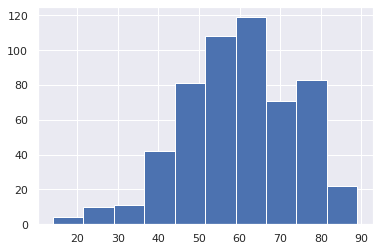

In [24]:
plt.hist(df['ETA'])

(array([ 91.,  87.,  81.,  65., 104., 104., 101., 106., 132., 129.]),
 array([14. , 21.5, 29. , 36.5, 44. , 51.5, 59. , 66.5, 74. , 81.5, 89. ]),
 <BarContainer object of 10 artists>)

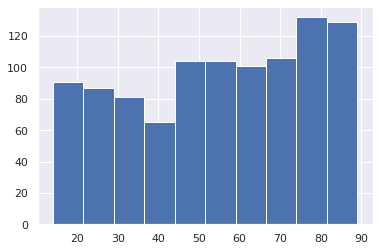

In [25]:
plt.hist(dfs['ETA'])

## Ispector

In [26]:
# Read both datasets using Pandas.
input_df = df
synthetic_df = dfs.iloc[:, 1:]
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)


Sesso
ETA
ASCVD_Score
DATA_INT
num_visita
Charlson_Totale
Charlson_Diabete
Stifness
CAP
FrailtyPhenotypeBool
EGA_HB
EGA_PaO2
EGA_SatO2
Pneumo_ProveFunzResp_FEV_FVCPre
Pneumo_ProveFunzResp_MEP
Pneumo_ProveFunzResp_MIP
Pneumo_ScalaBorg
TestCammino6Min_BorgBase
TestCammino6Min_BorgEnd
TestCammino6Min_Distanza
Alcool
BMI
BMI_Ricovero
BMIPostRicovero
Fumatore
Pack_years
Sintomi_Cadute
Sintomi_DifficoltaDeglutizione
Sintomi_DistUdito
Sintomi_DistVista
SintomiNeuropsico_Ageusia
SintomiNeuropsico_Anosmia
SintomiNeuropsico_Astenia
SintomiNeuropsico_CognitivoAttenzione
SintomiNeuropsico_CognitivoConcentrazione
SintomiNeuropsico_CognitivoMemoria
SintomiNeuropsico_DistEquilibrio
SintomiNeuropsico_DistSonno
SintomiNeuropsico_DoloriMuscolari
SintomiNeuropsico_Effluvium
VitaCm
CALORIE
PROTEINE_Perc
CogStateScore_Esito
GlobuliBianchi
Linfociti_Assoluti
Neutrofili
Piastrine
GPT_ALT
D_dimero
Fibrinogeno
Glicemia
INSULINA
PCR
DurataRicovero
TempoDallaVisita
Descrizione
AssumePiuFarmaciGiorno
PersoPeso
Ca

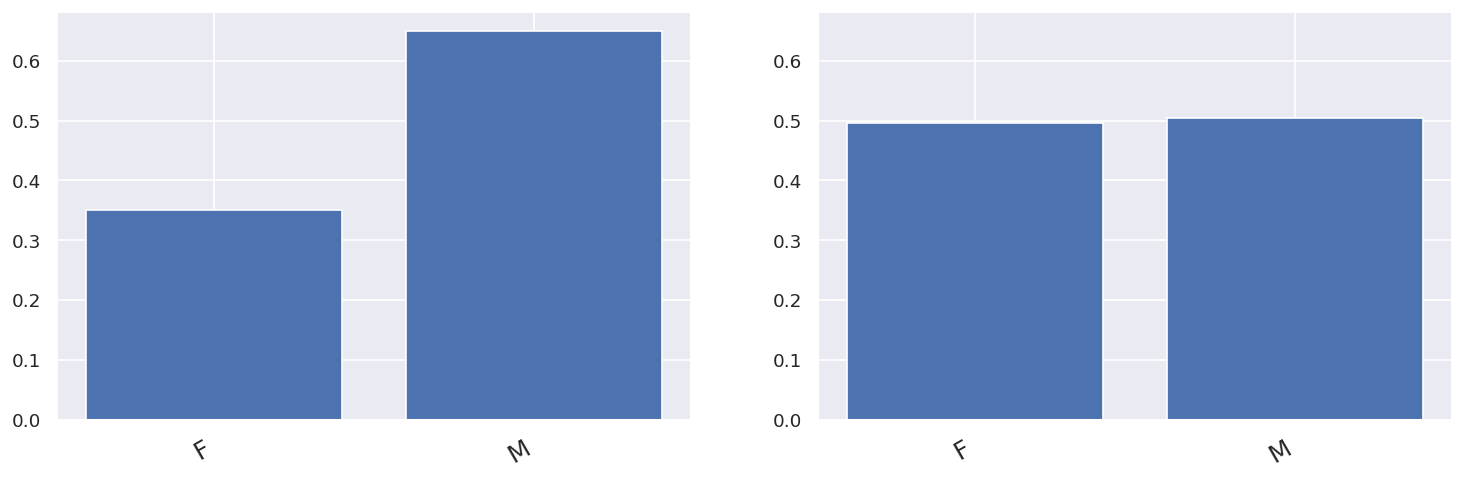

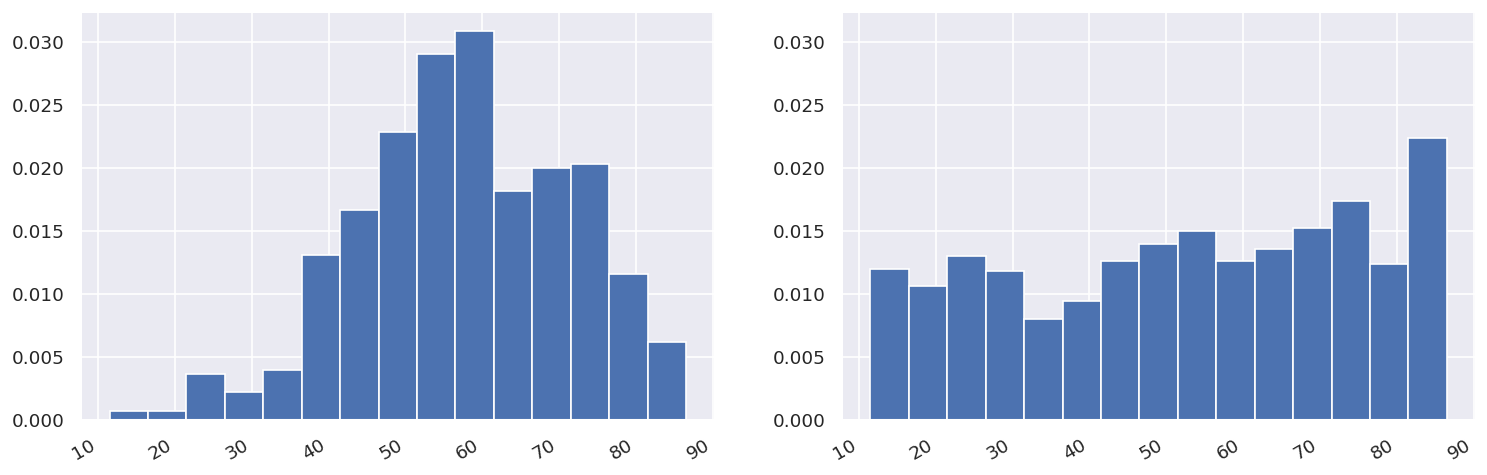

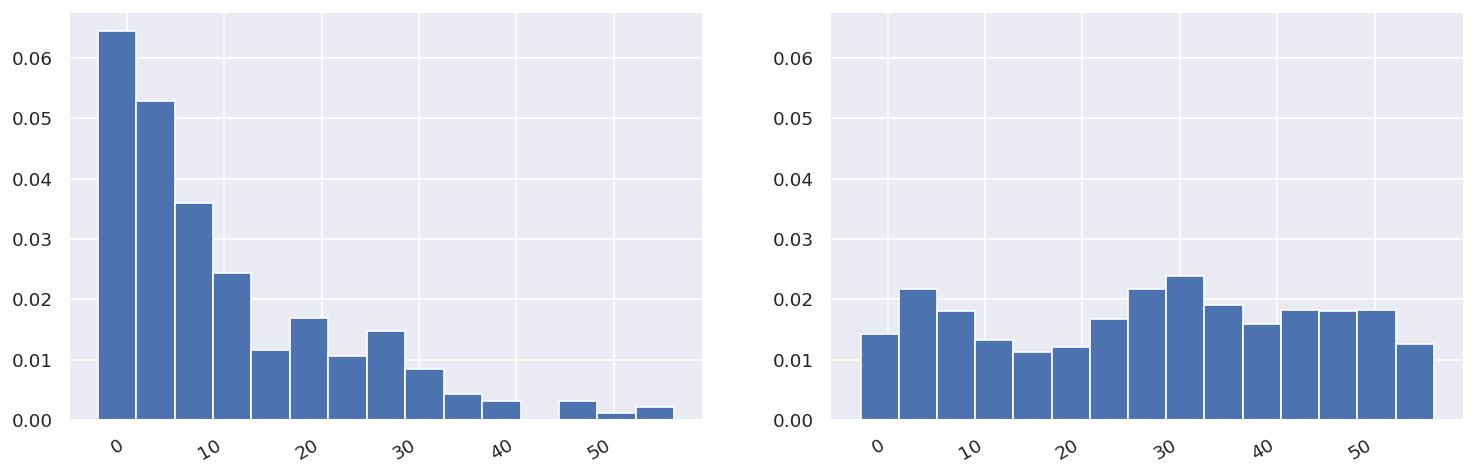

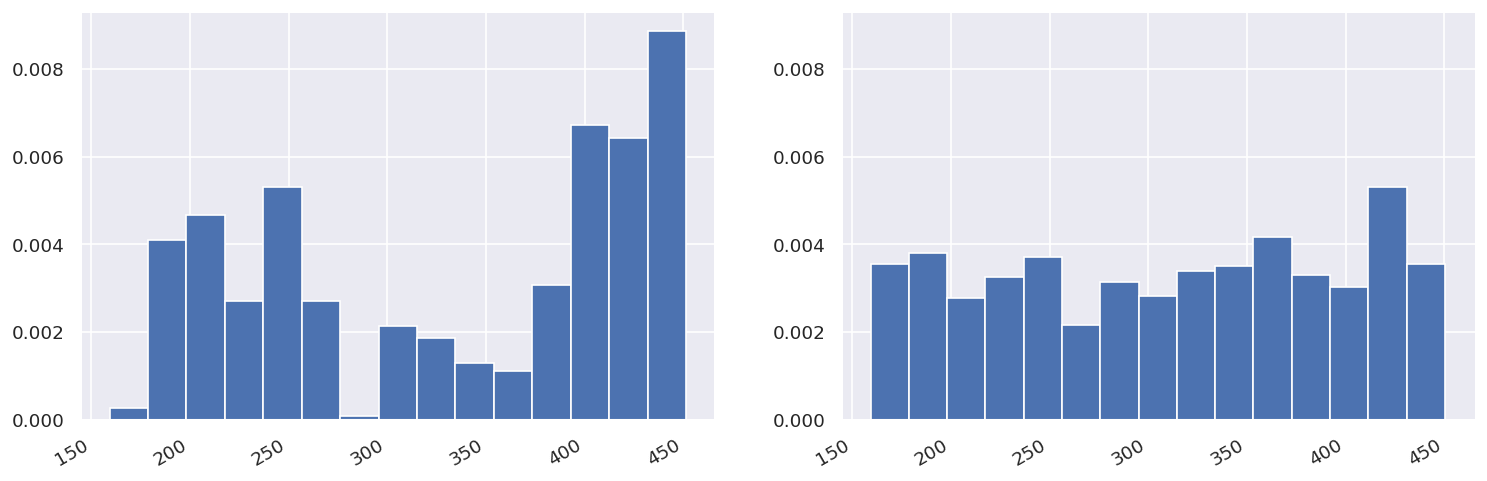

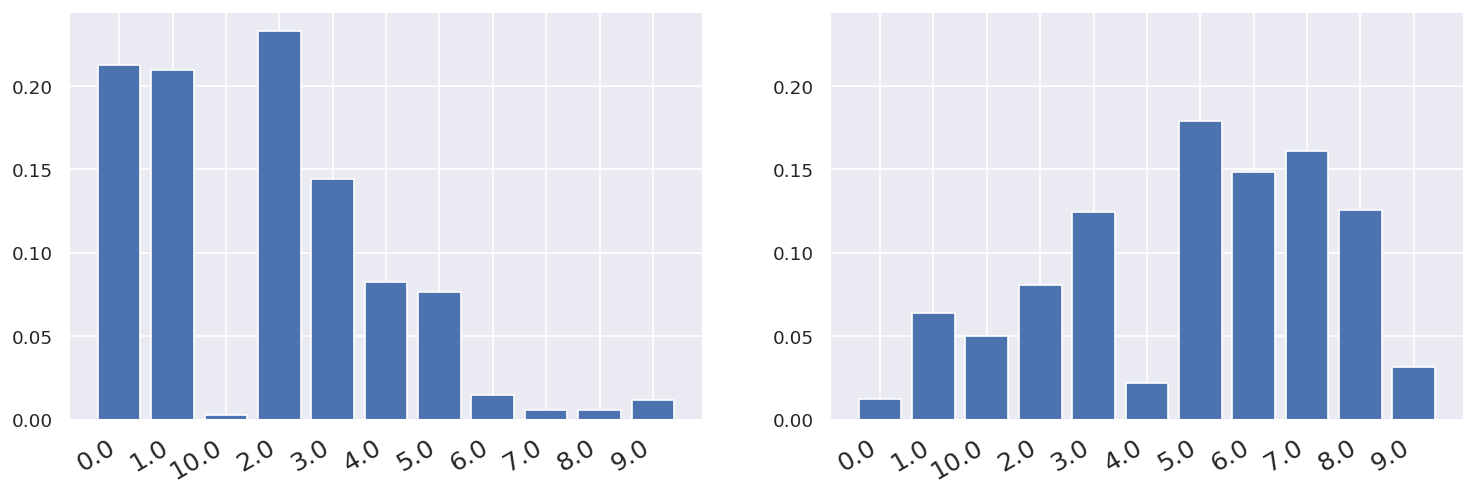

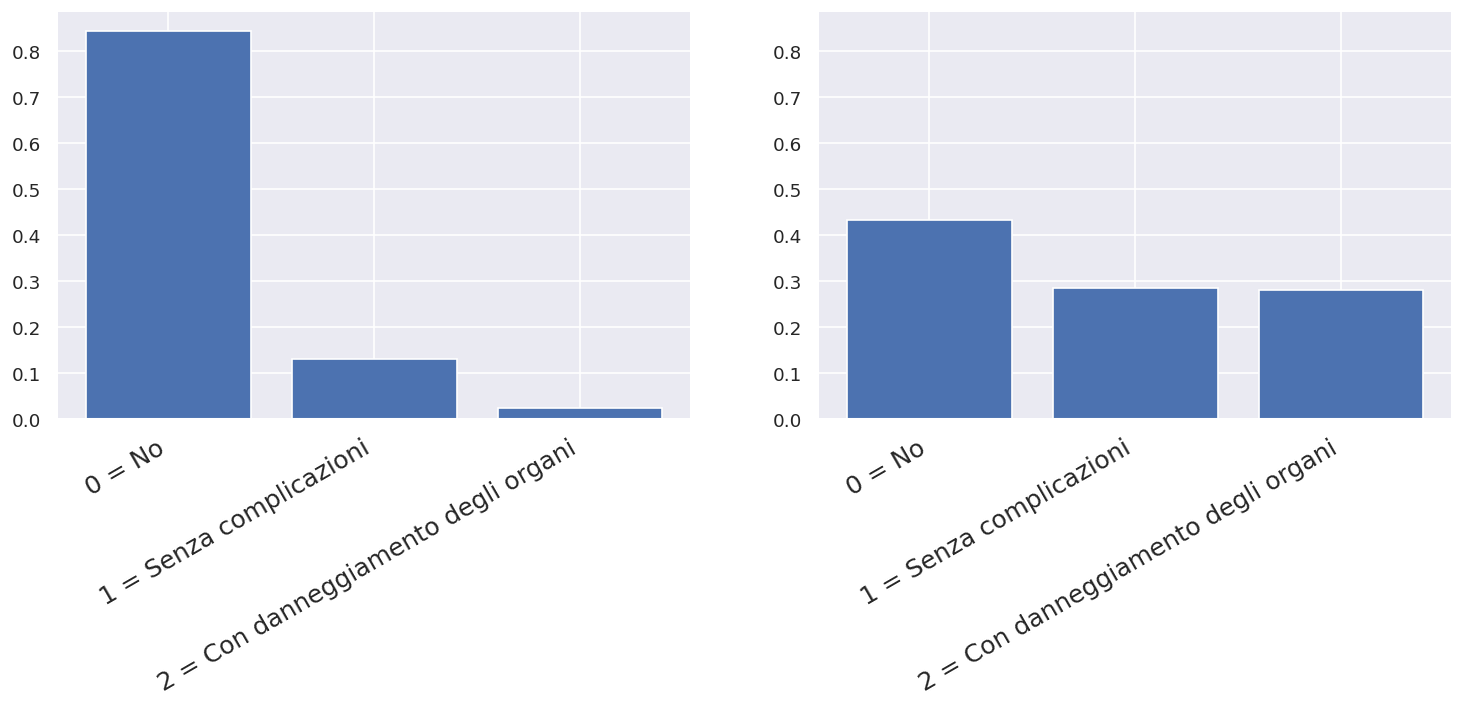

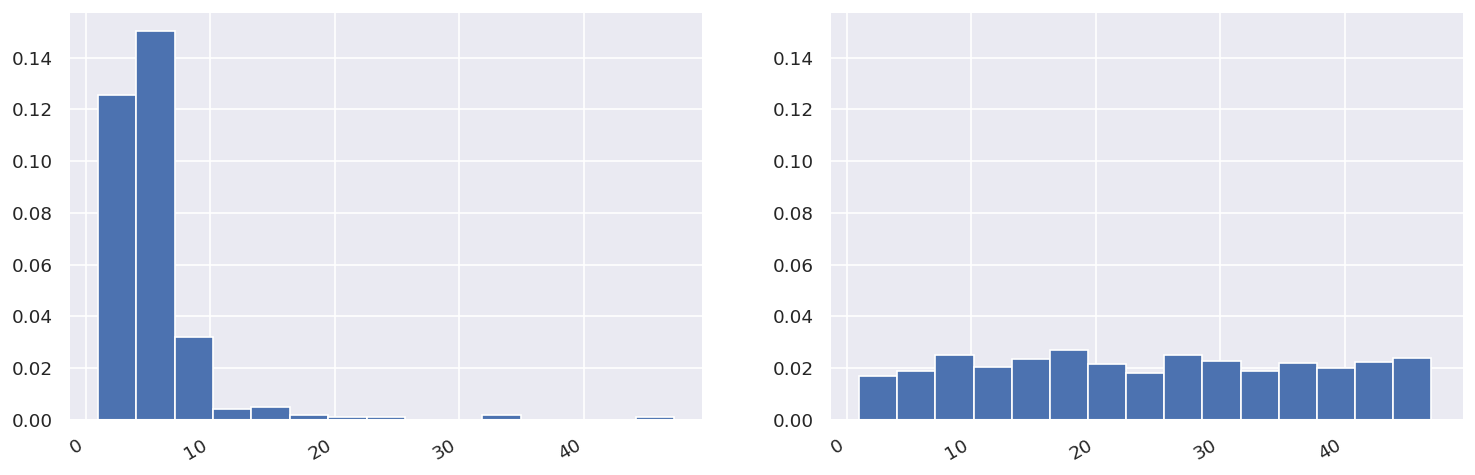

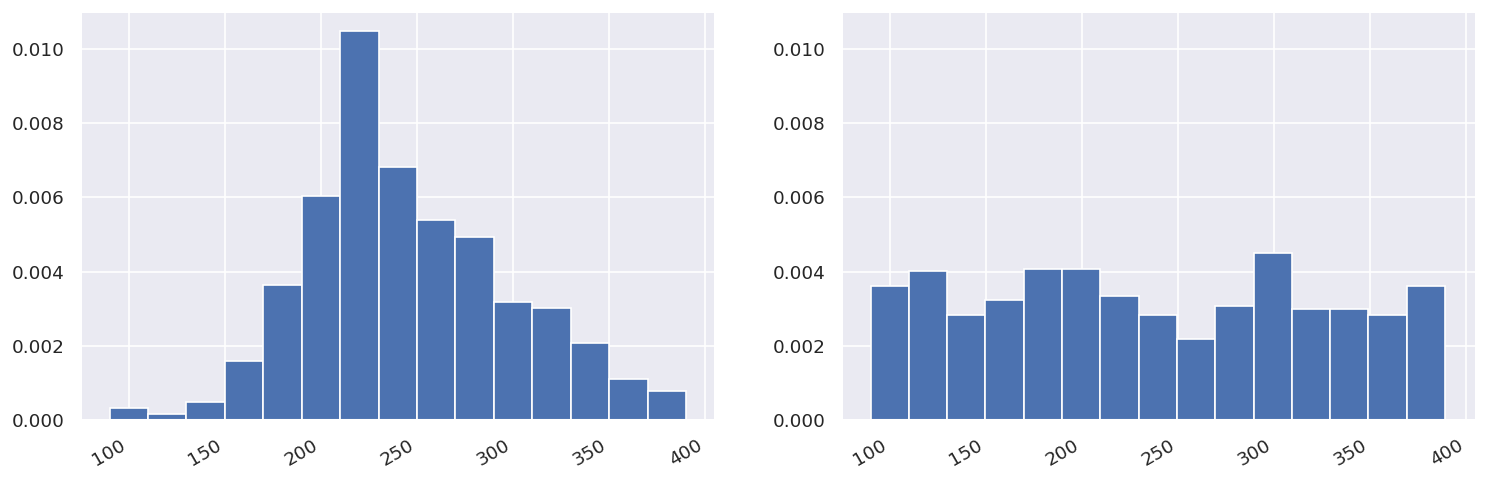

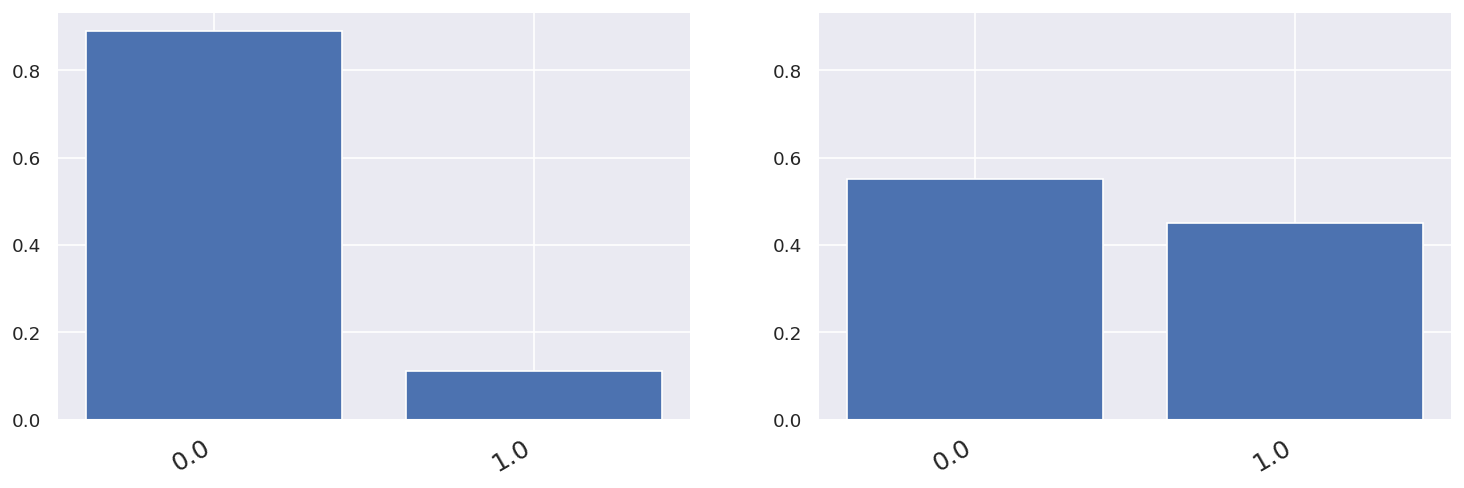

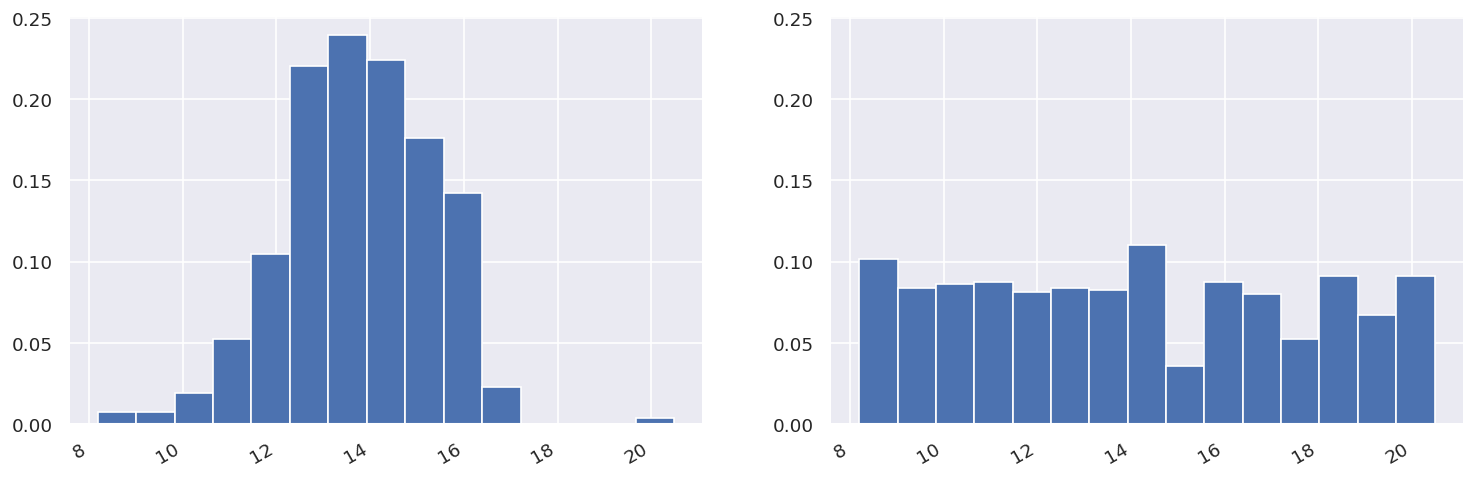

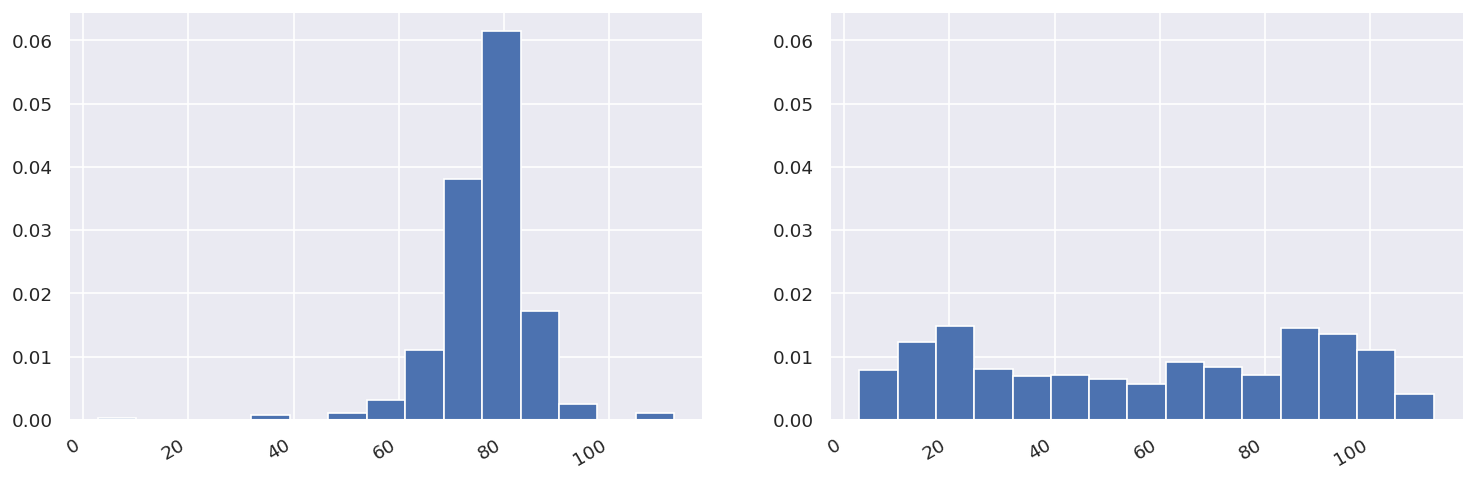

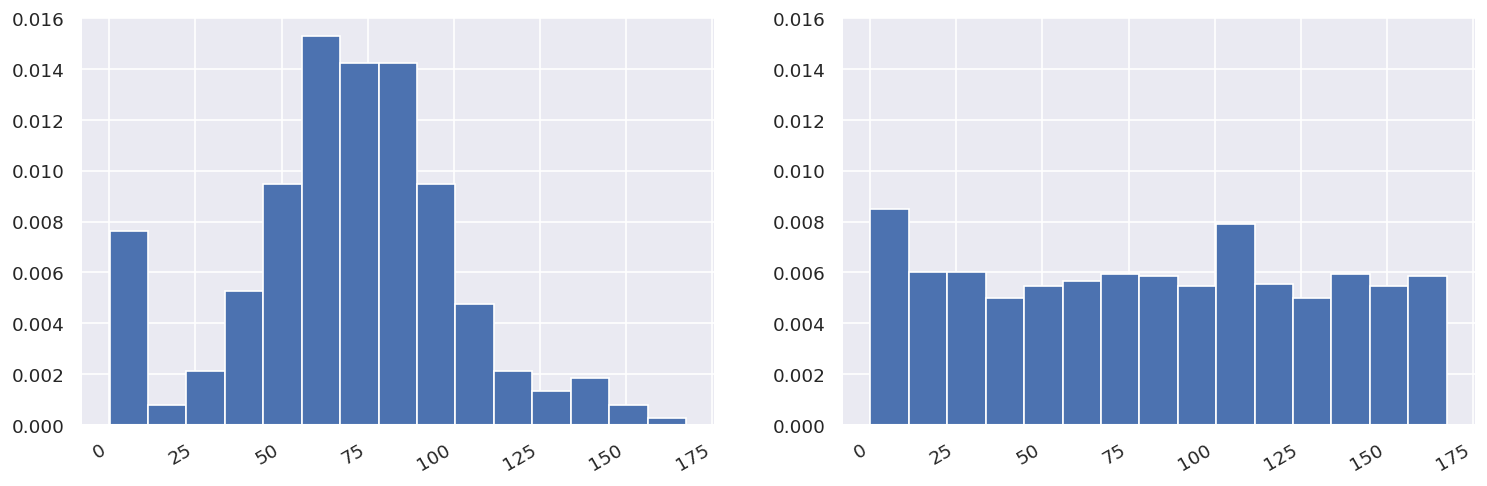

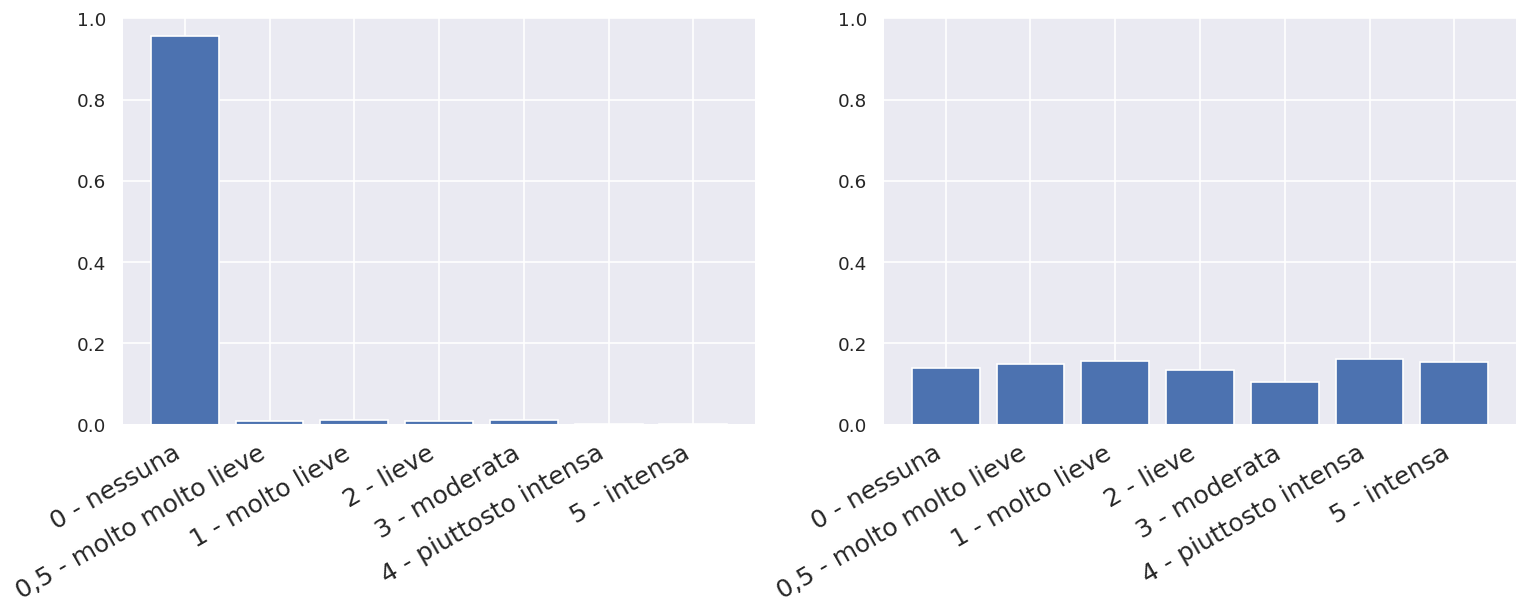

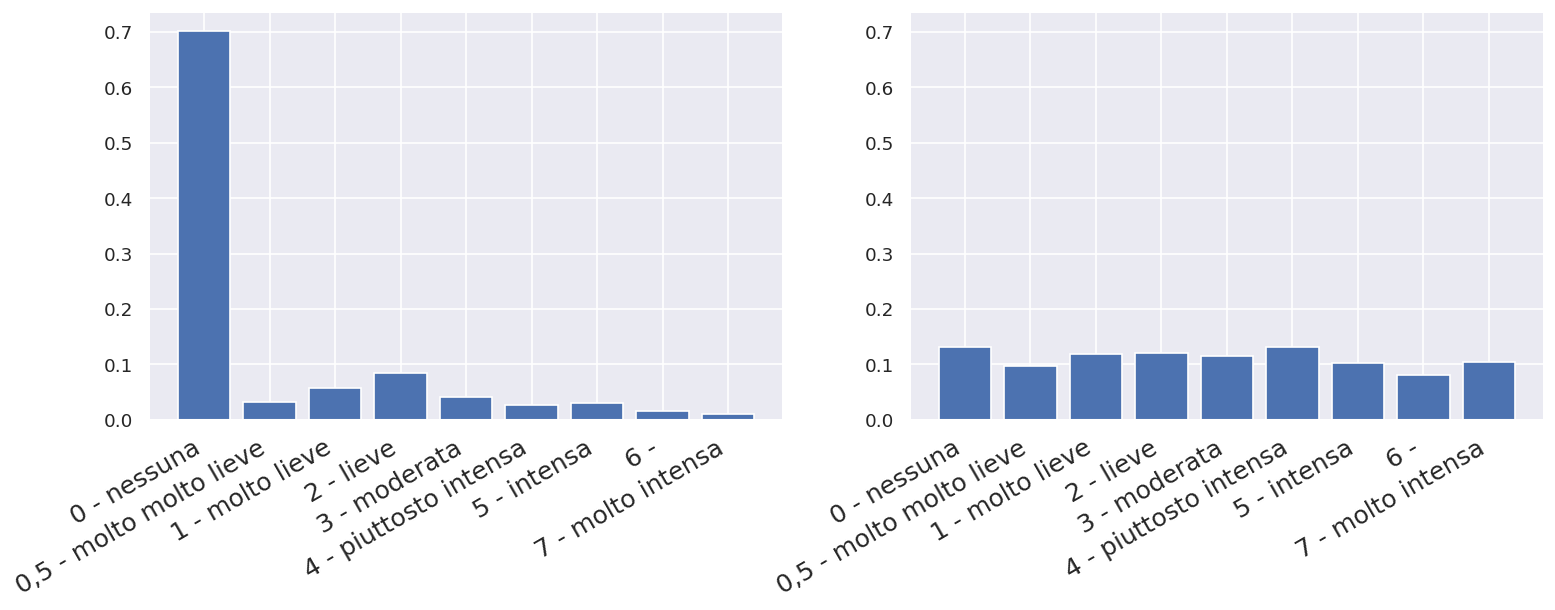

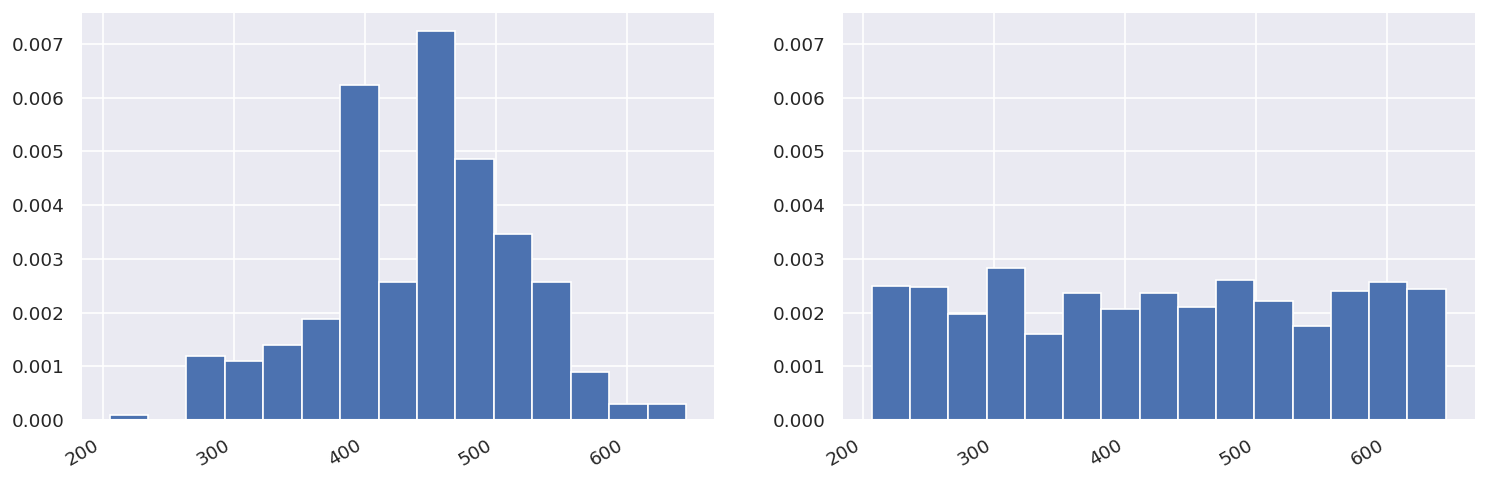

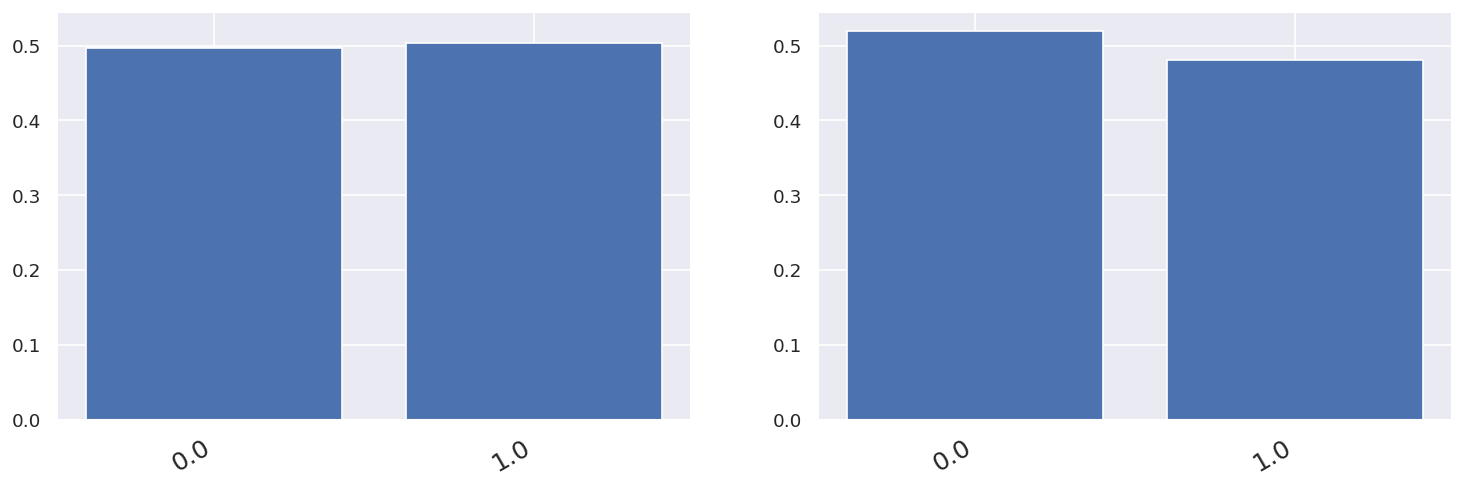

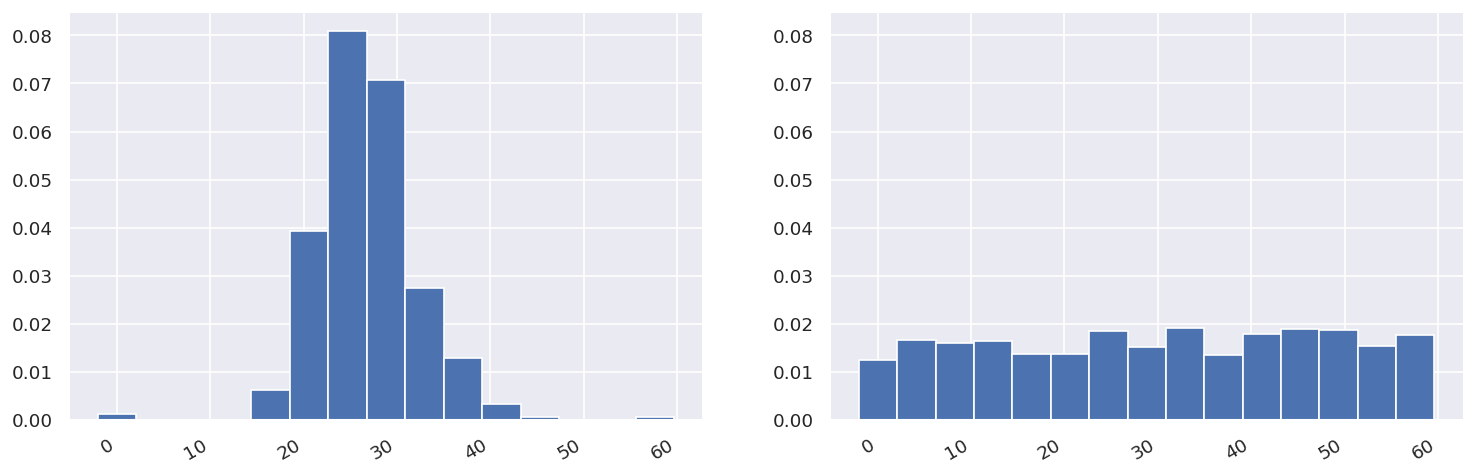

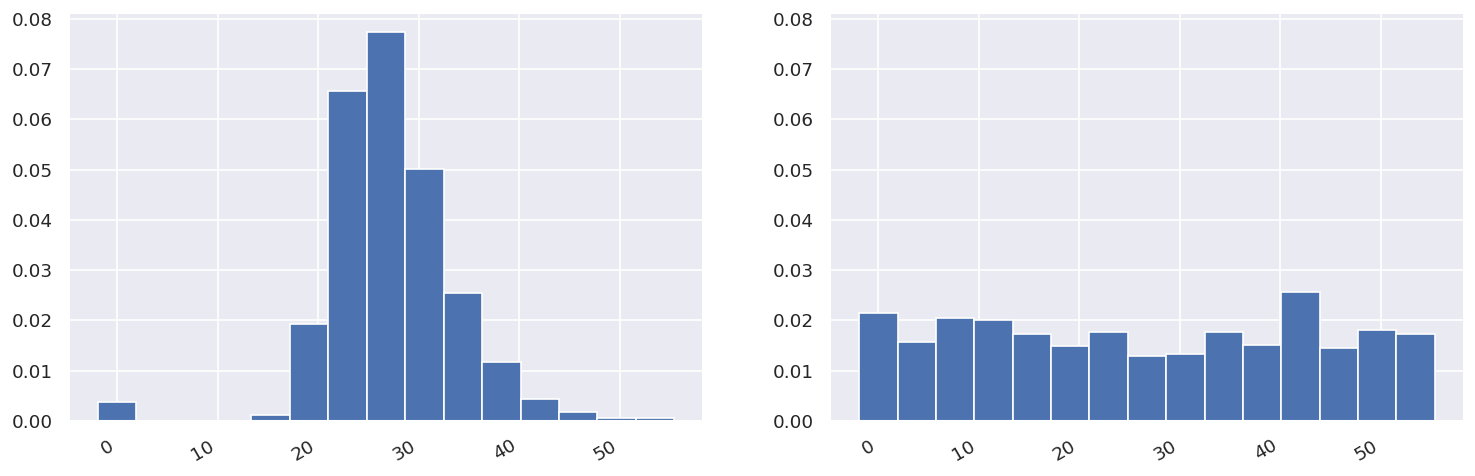

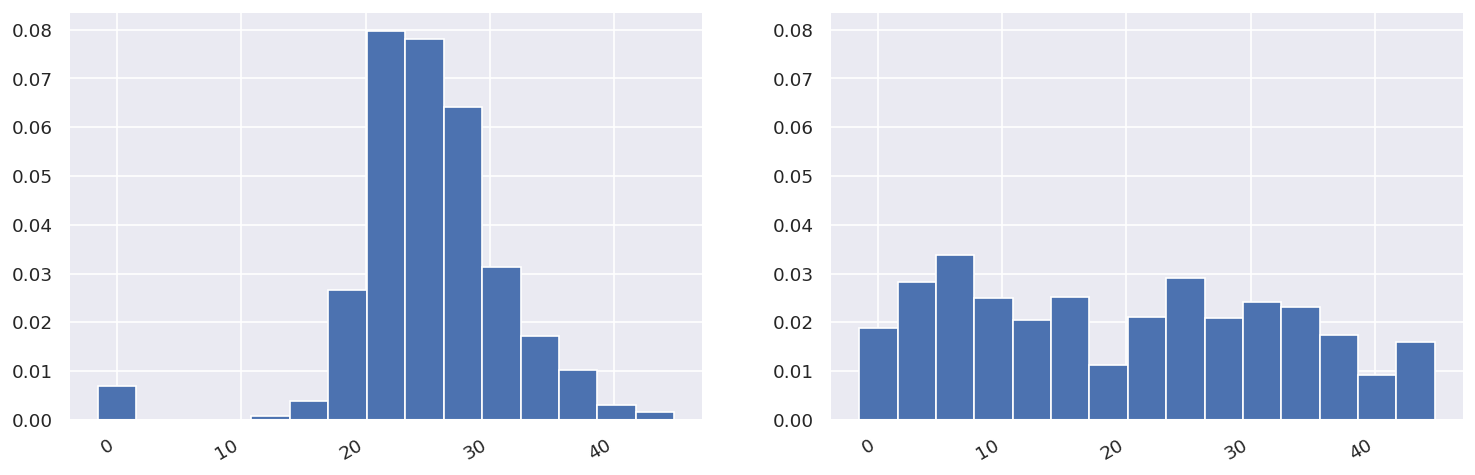

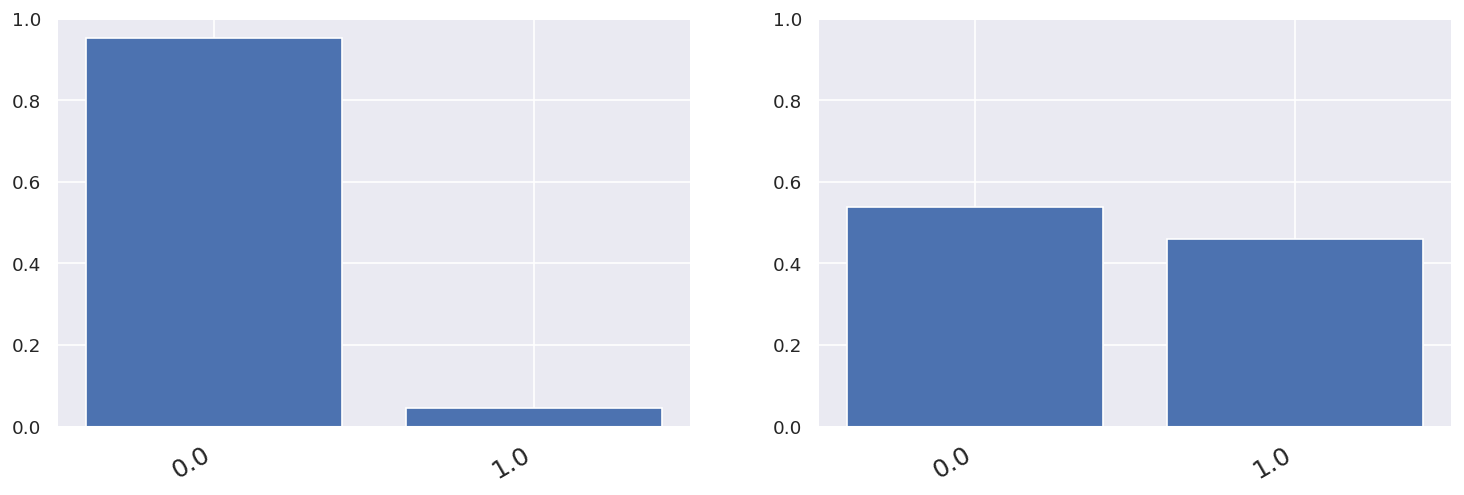

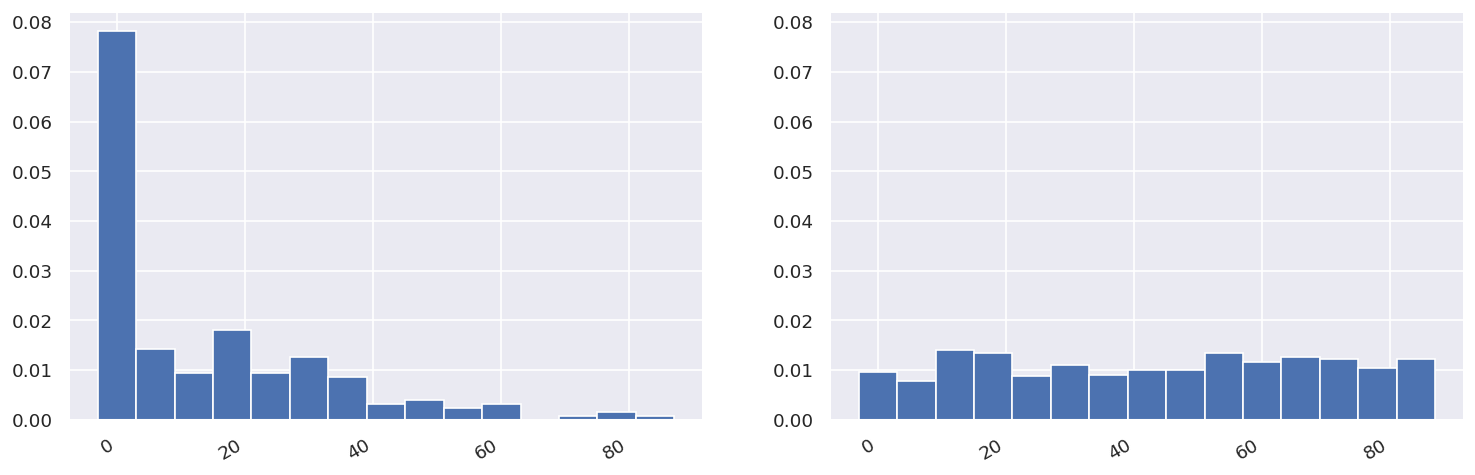

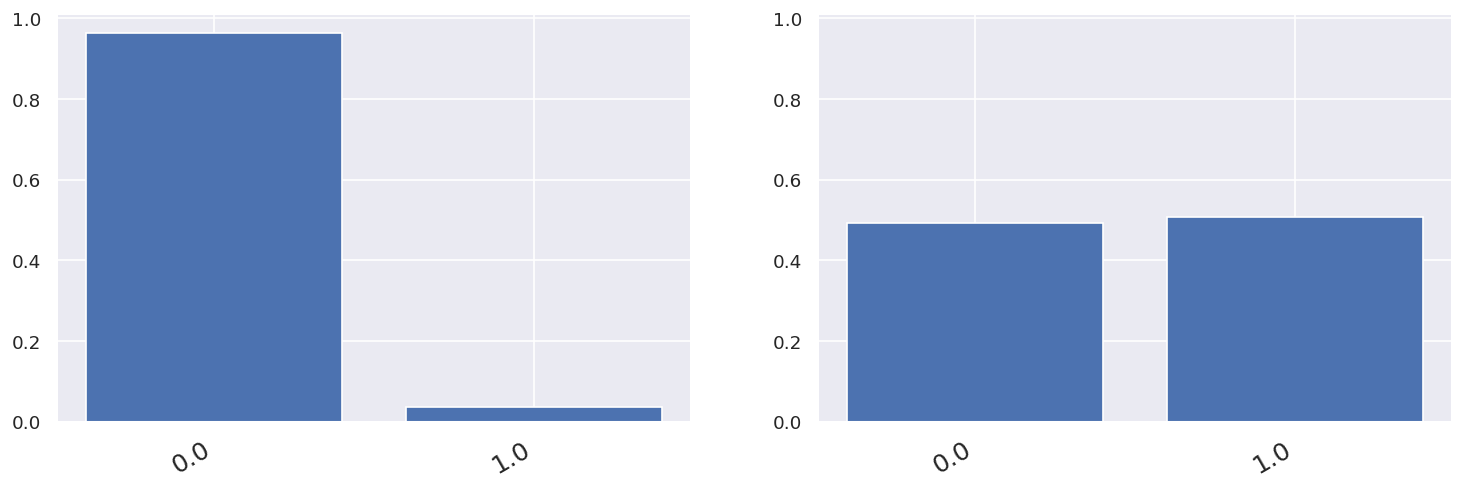

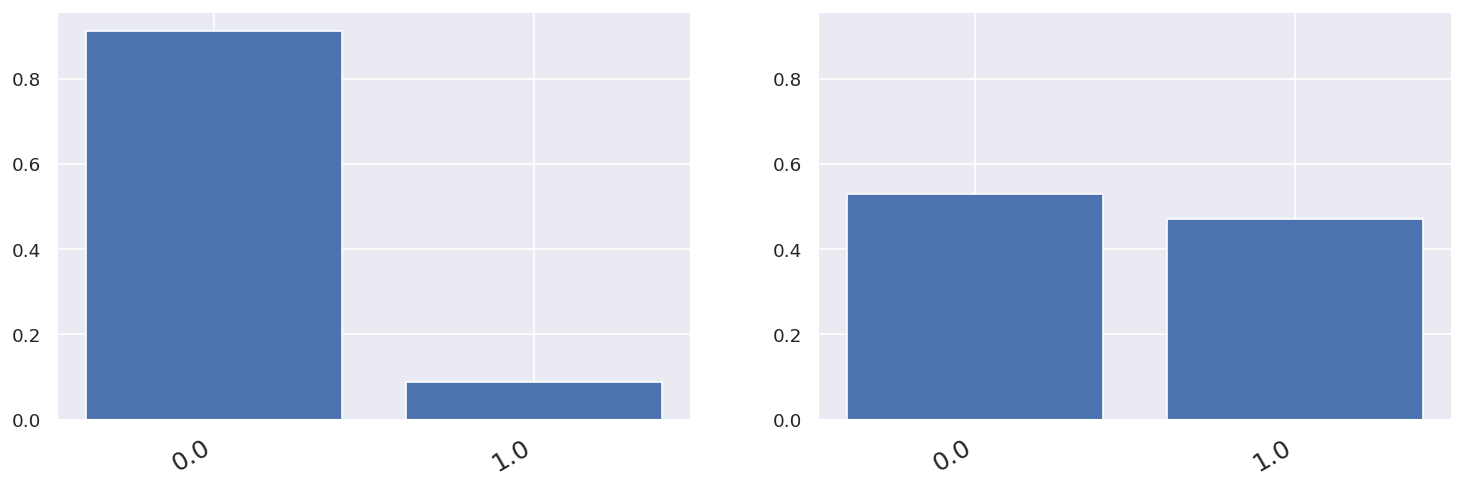

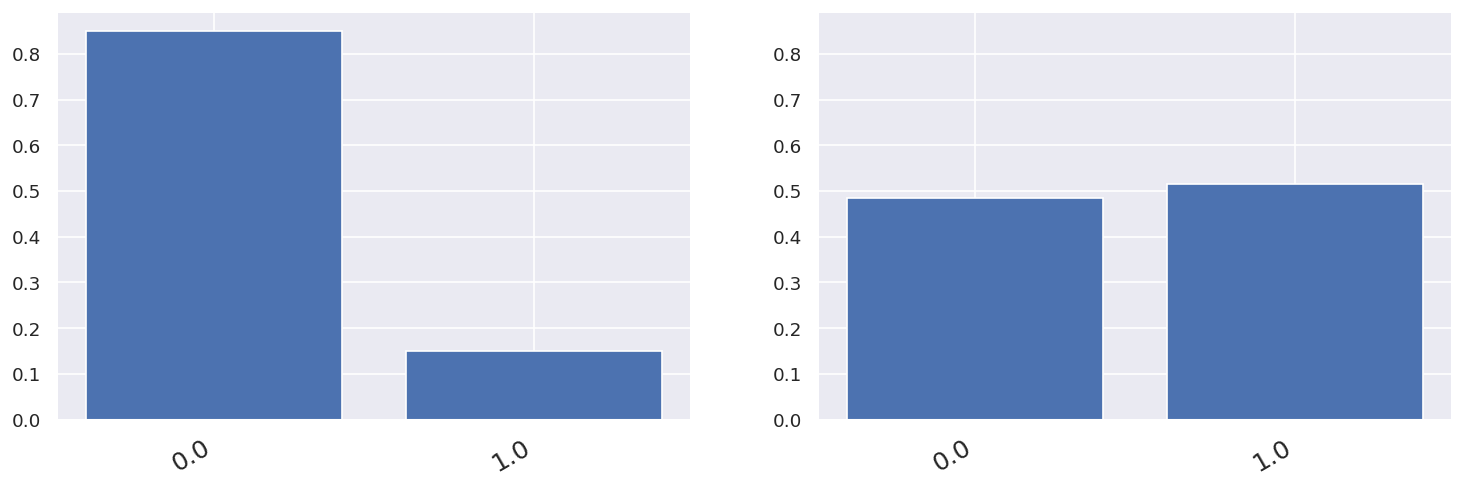

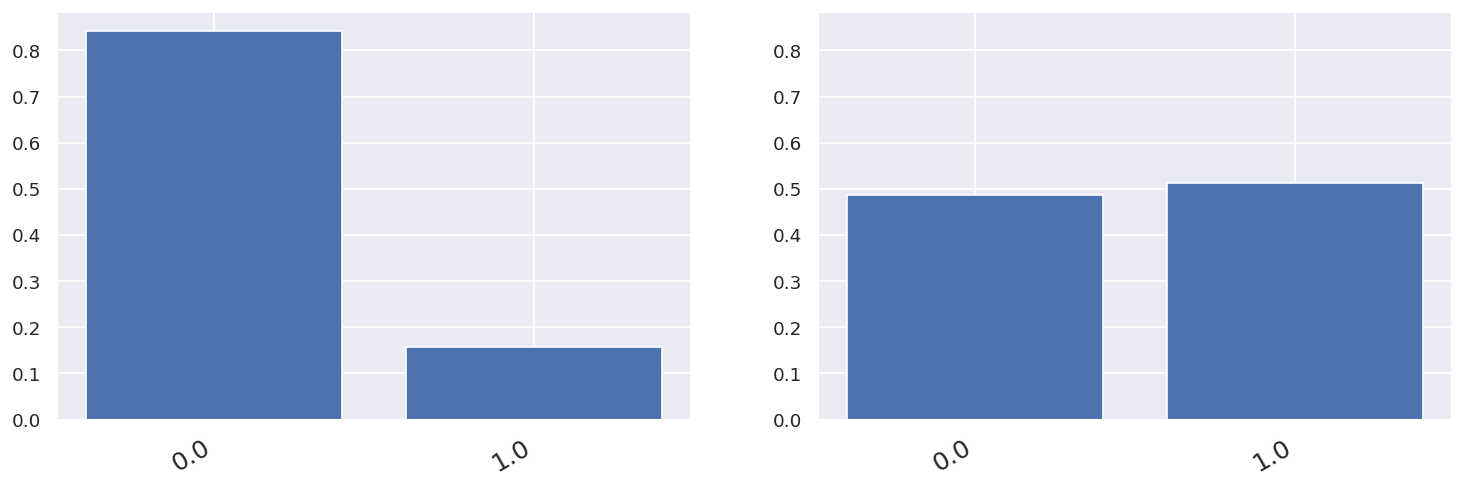

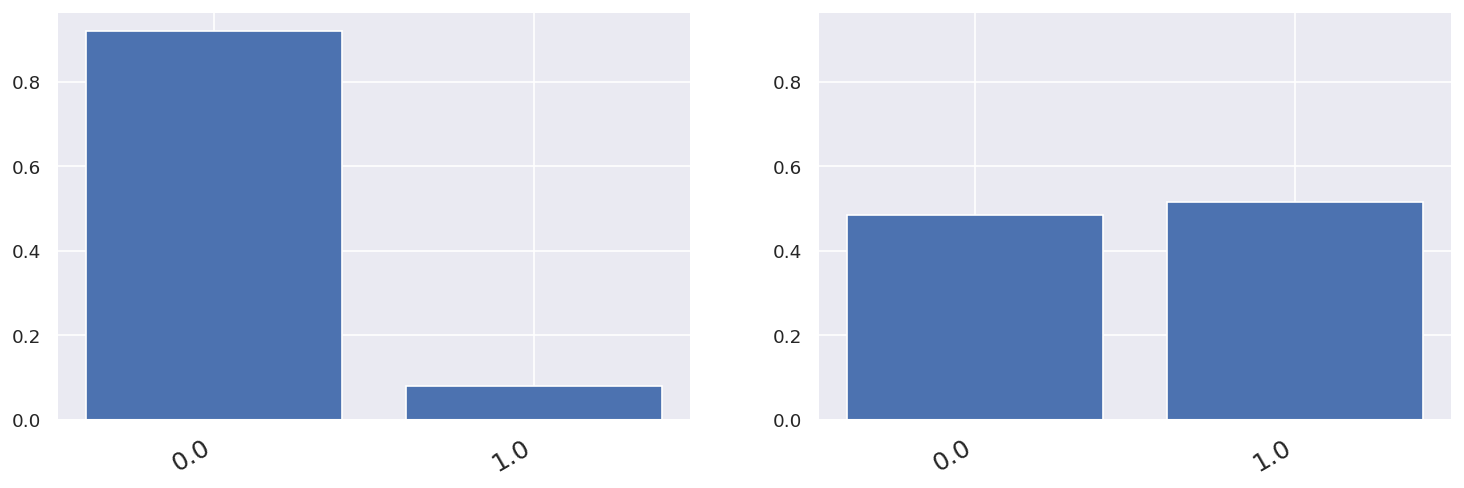

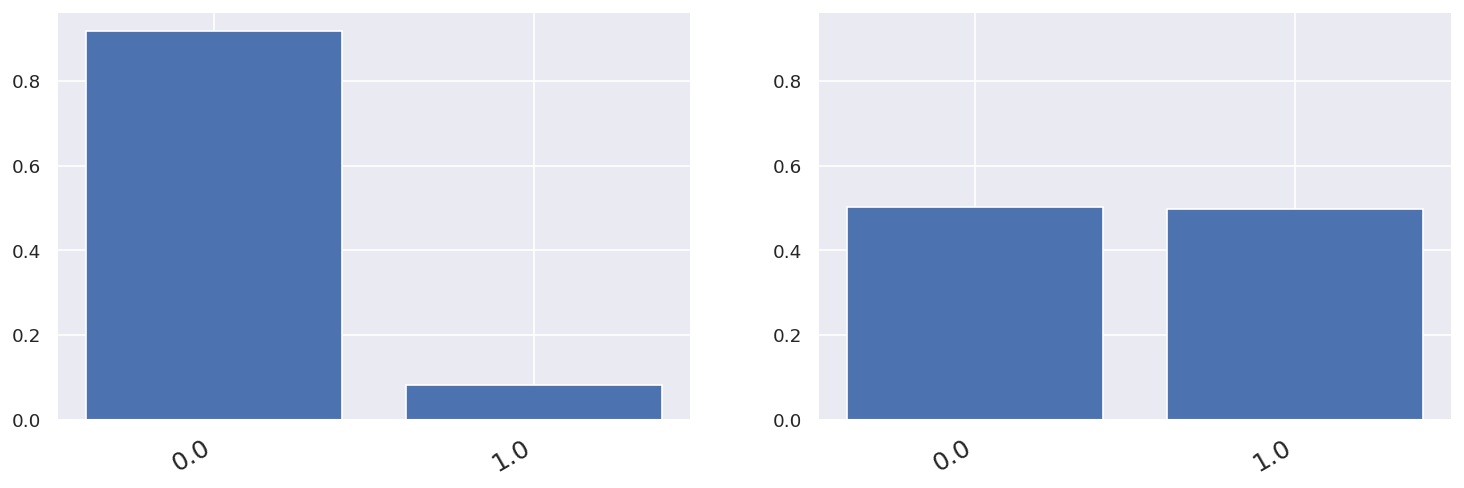

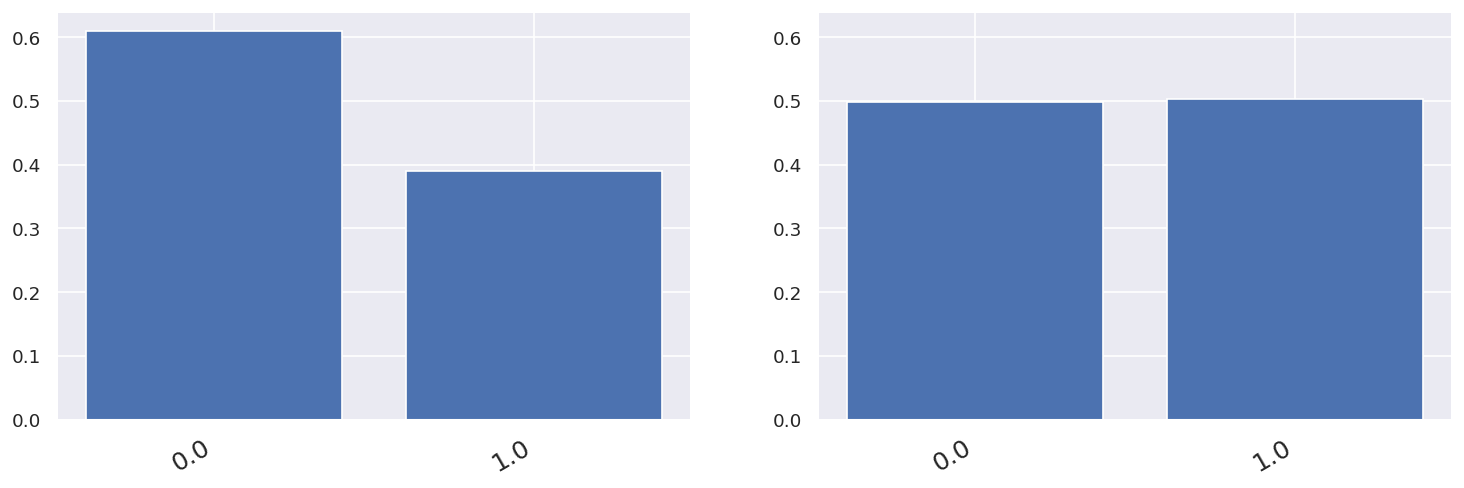

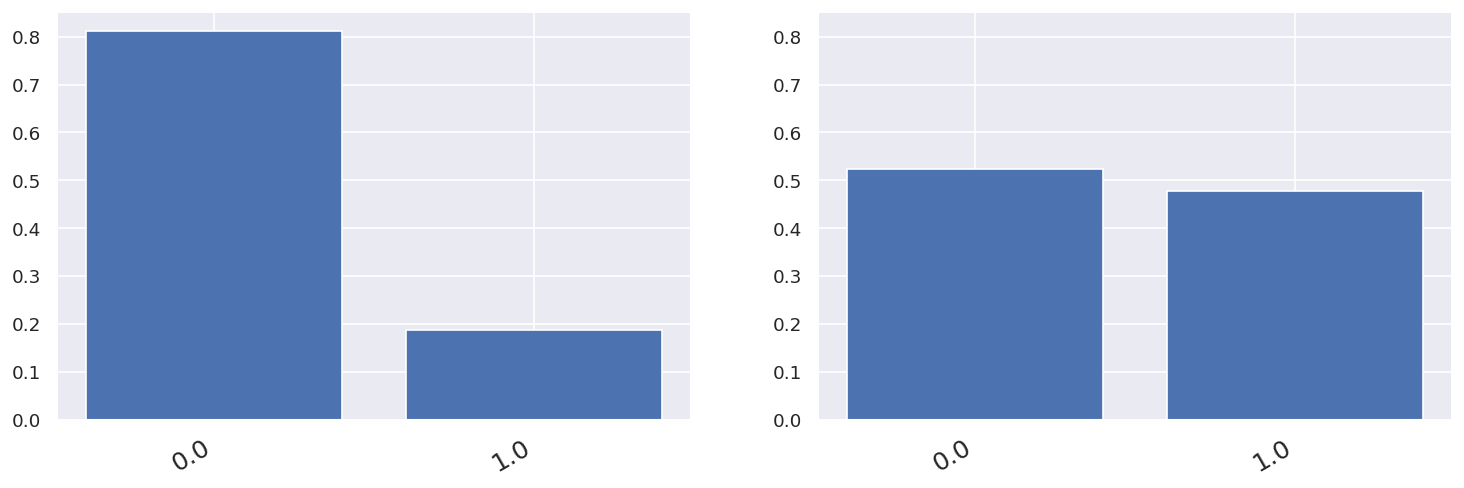

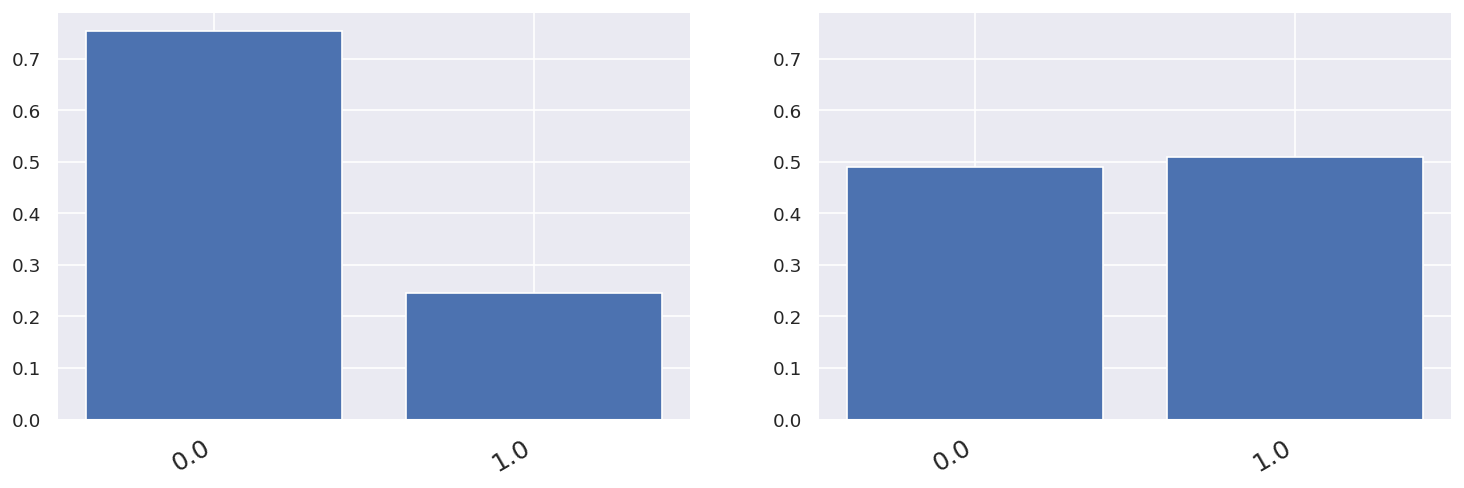

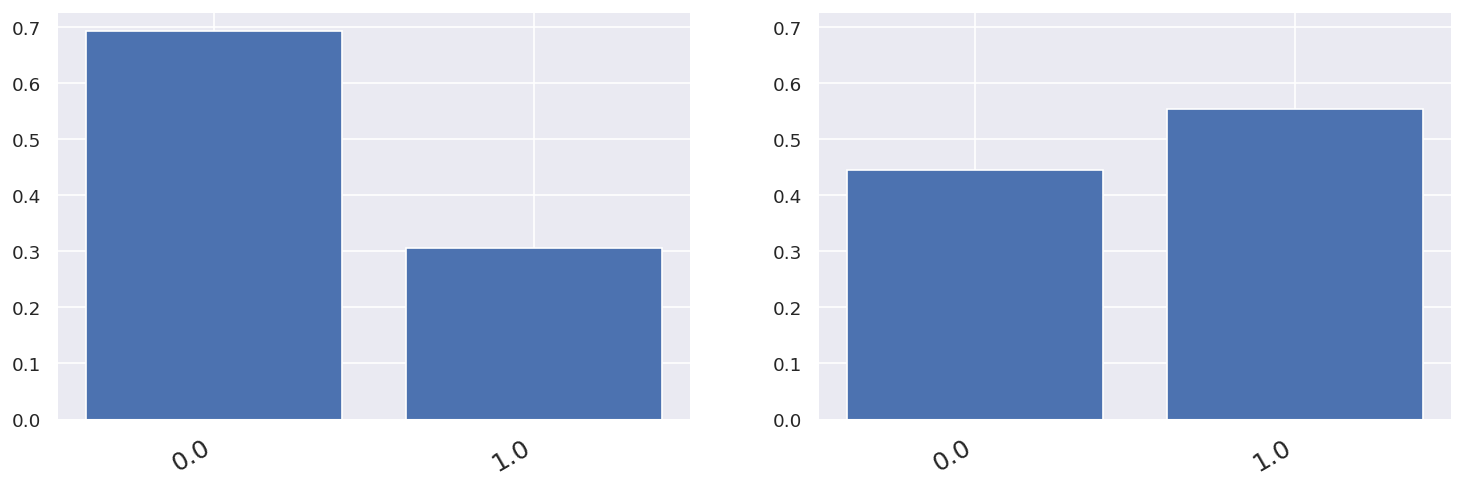

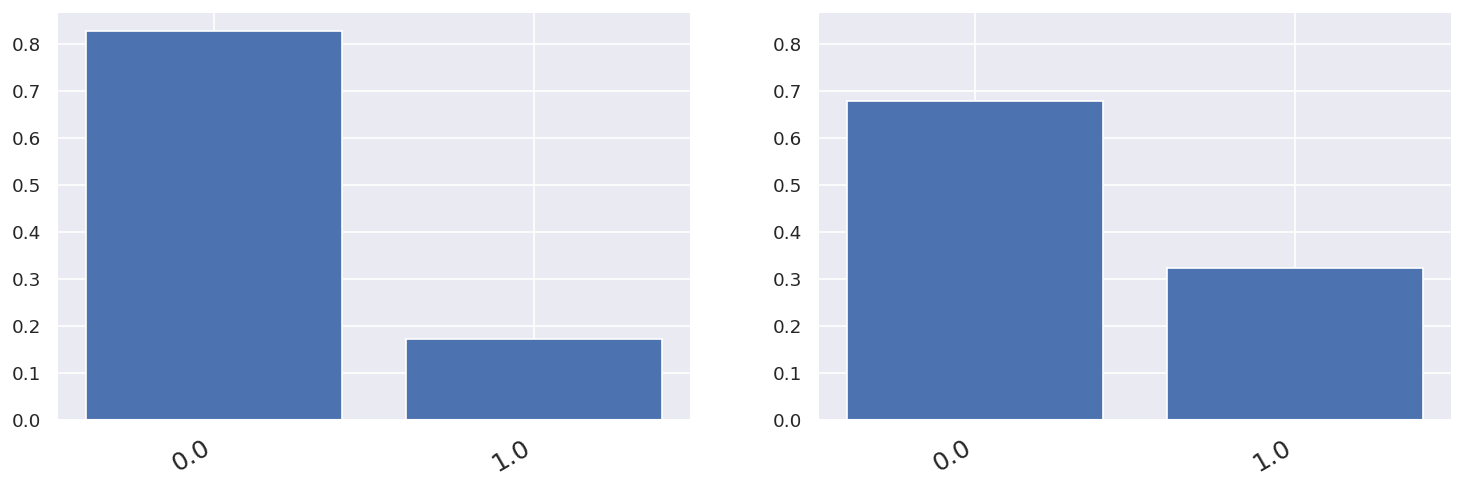

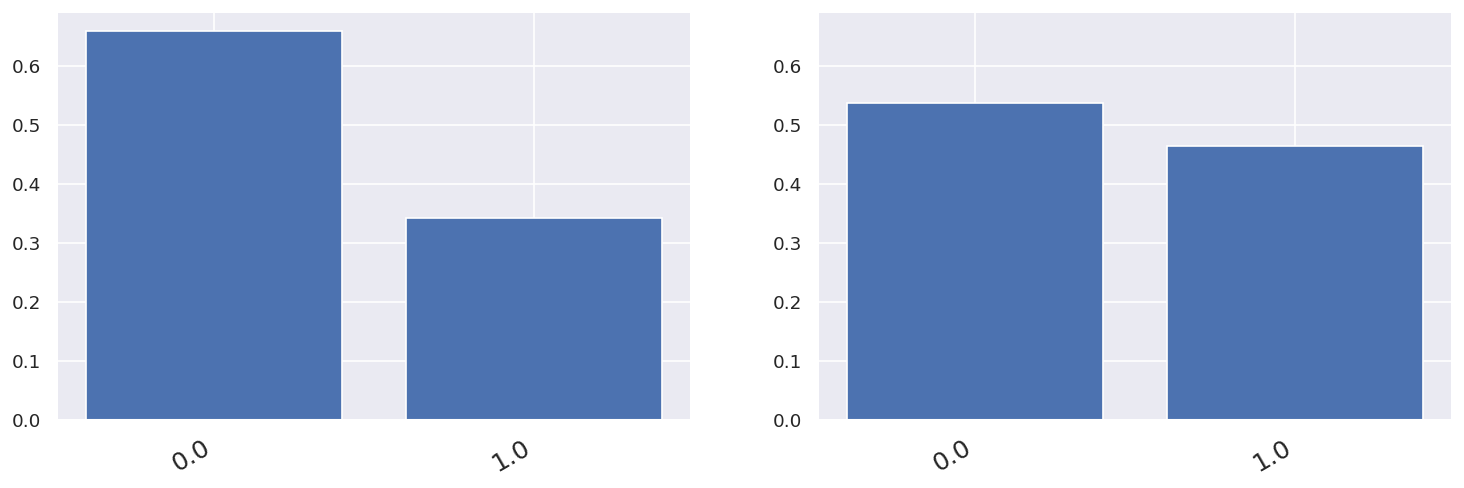

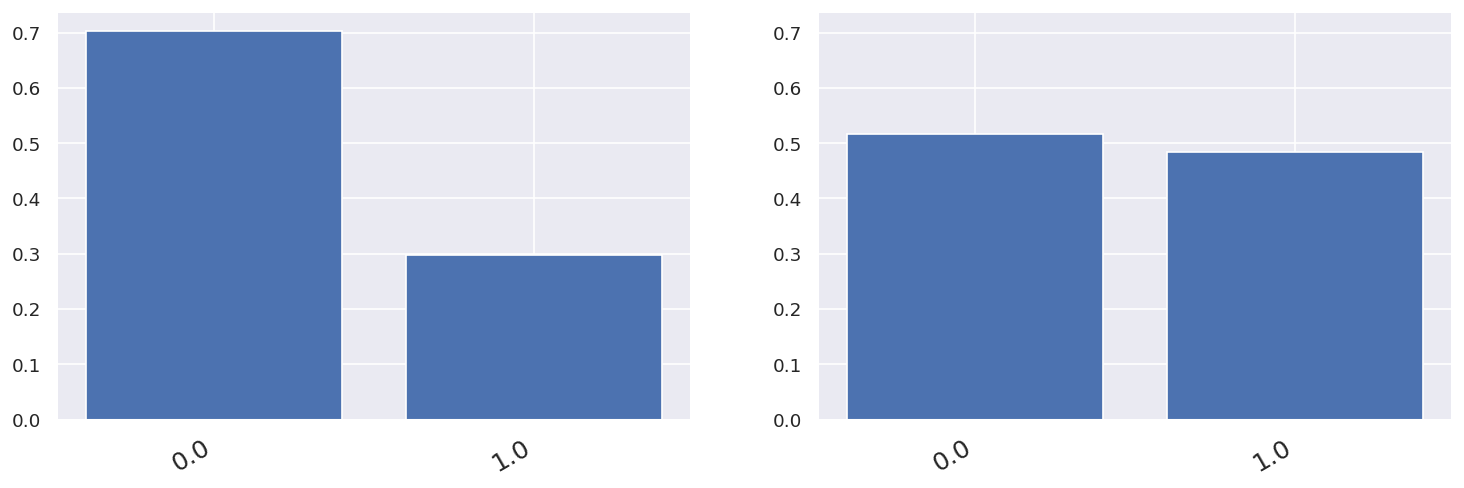

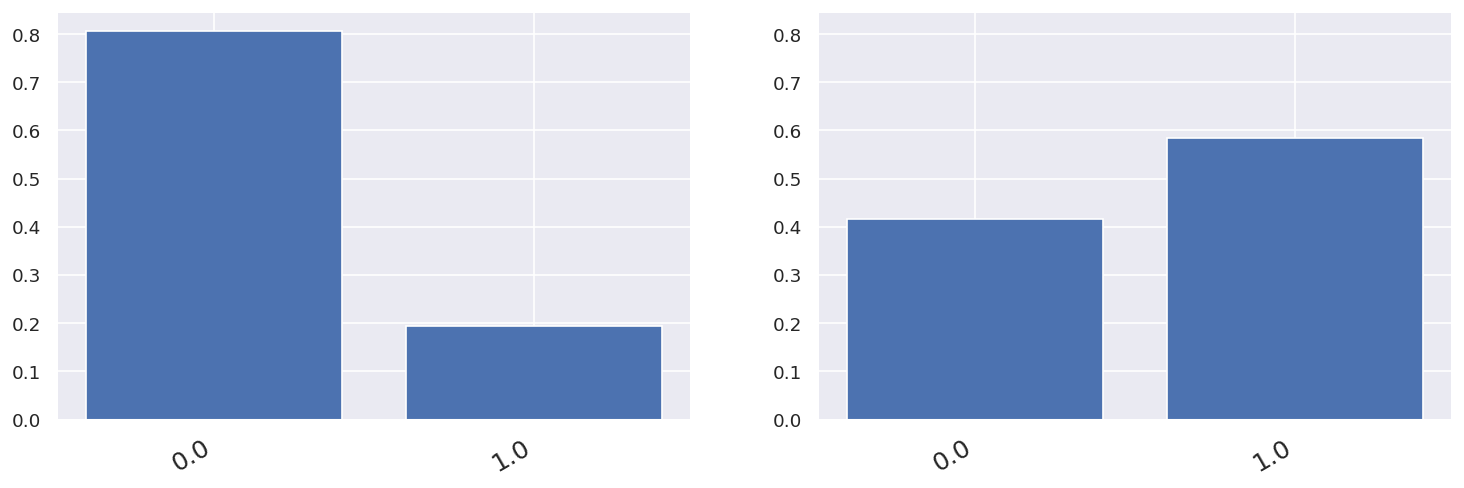

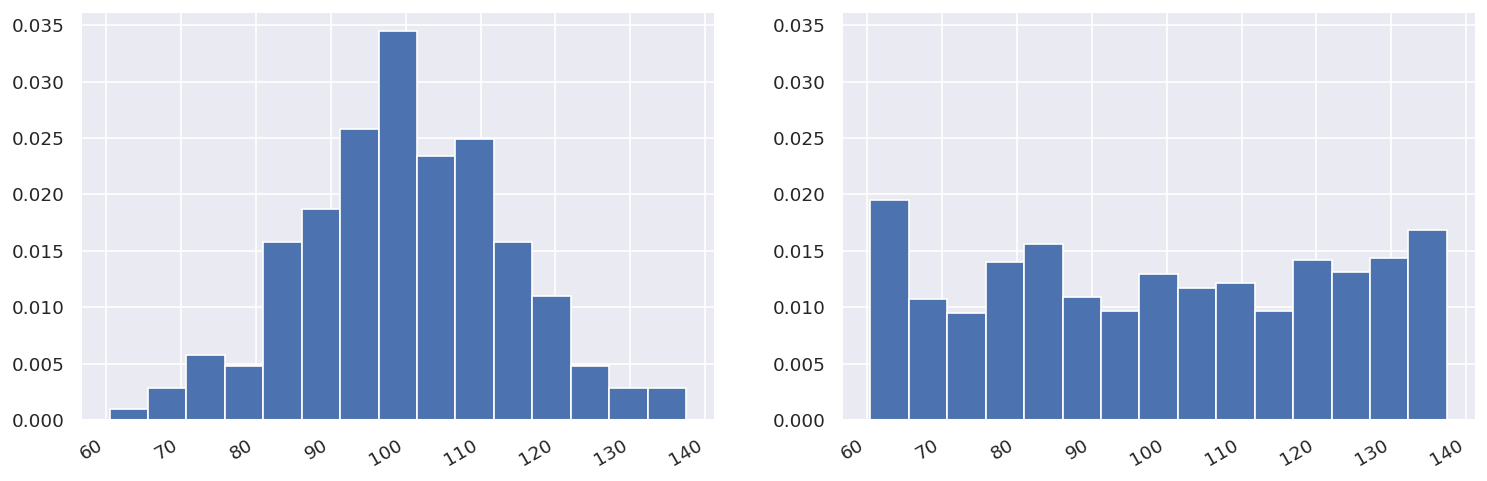

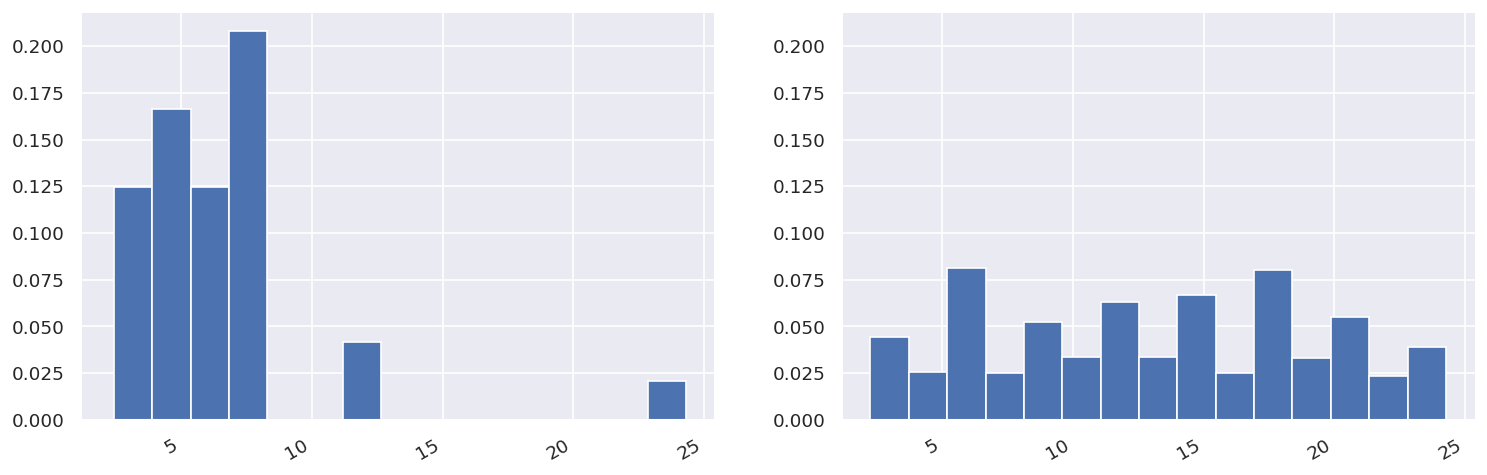

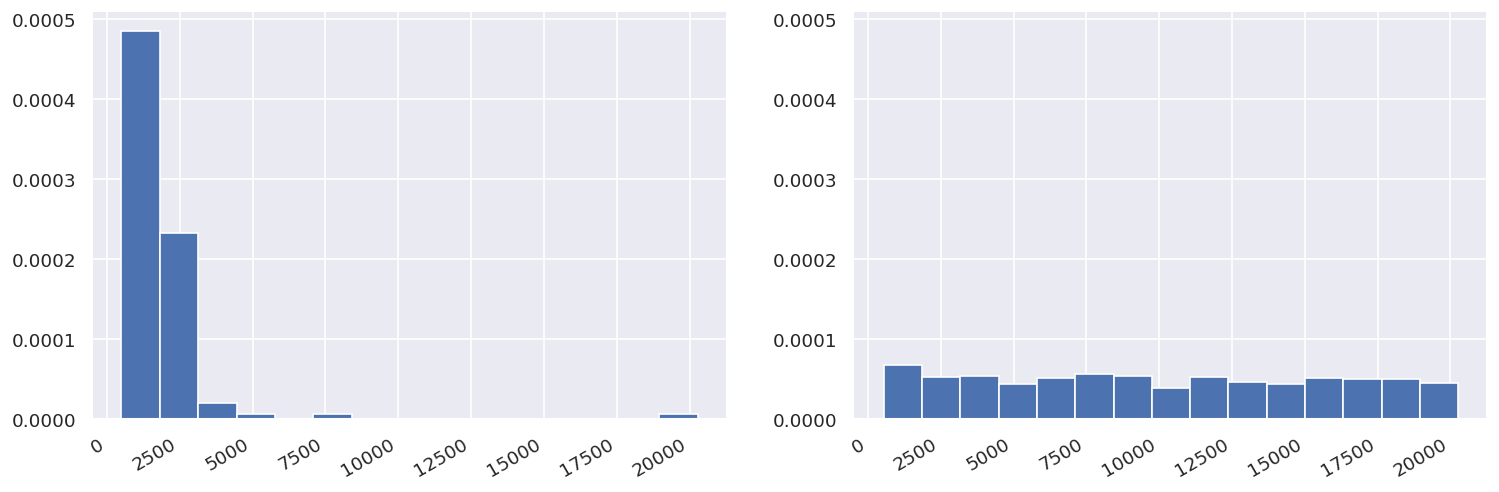

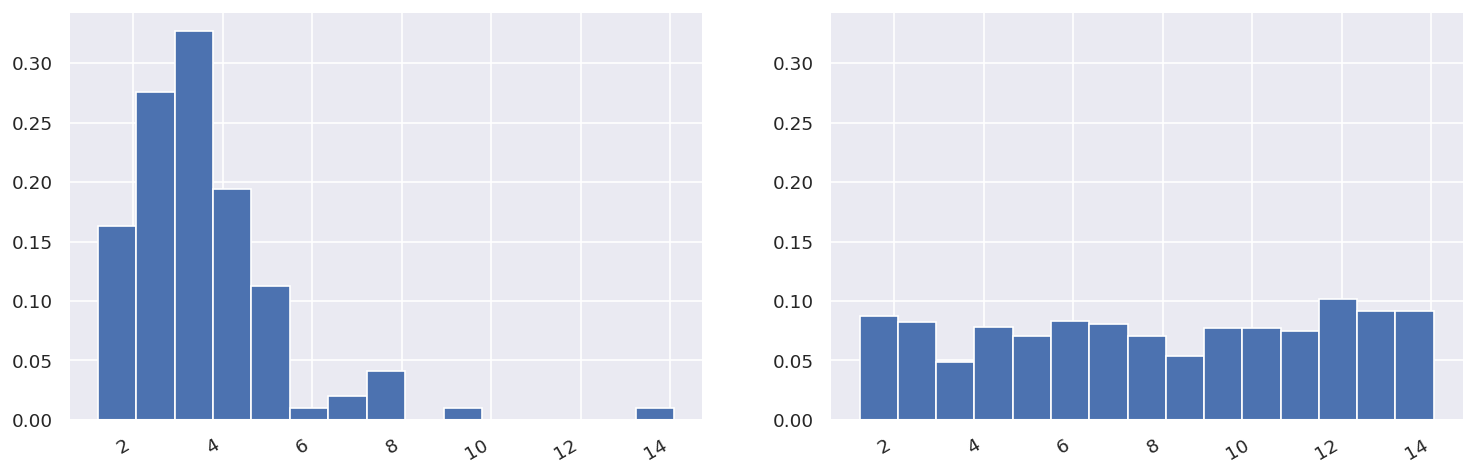

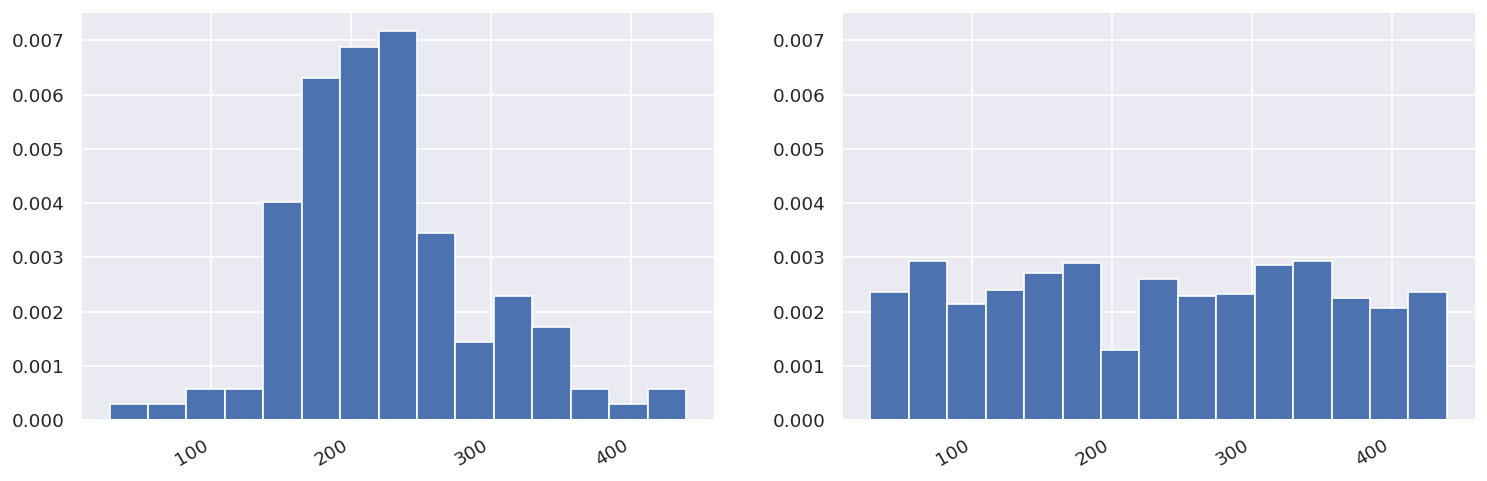

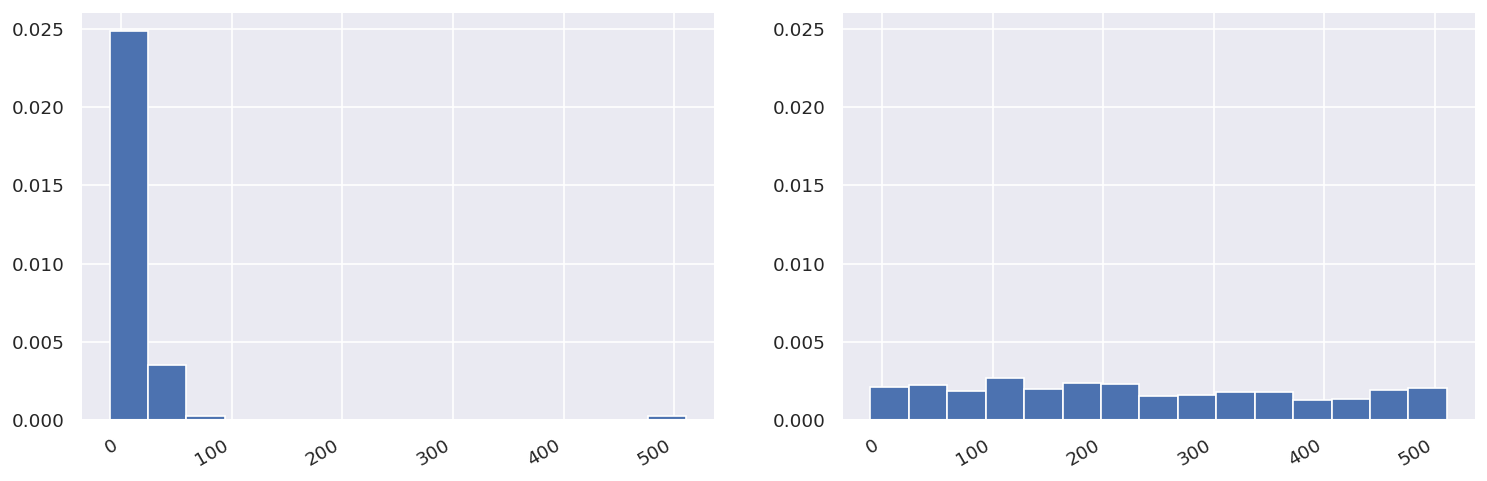

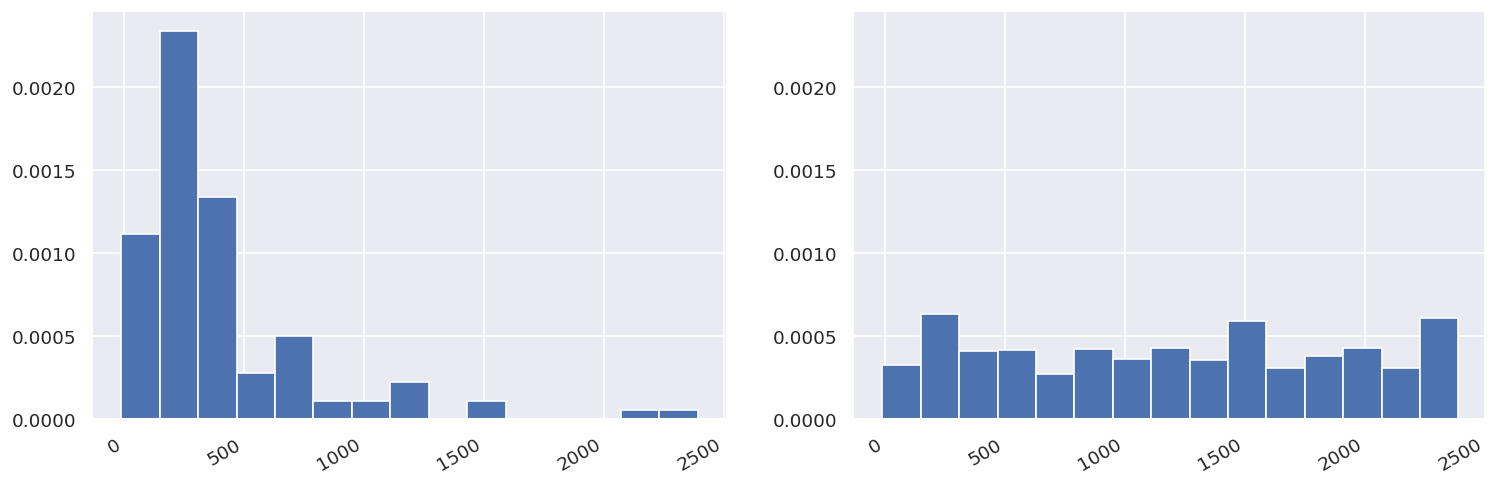

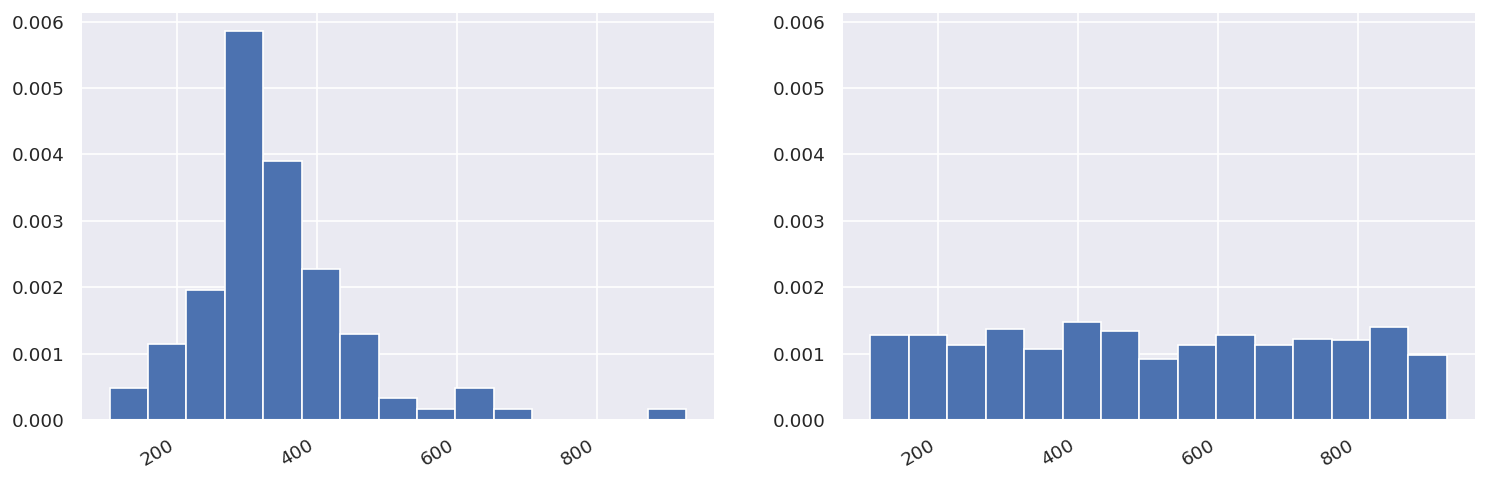

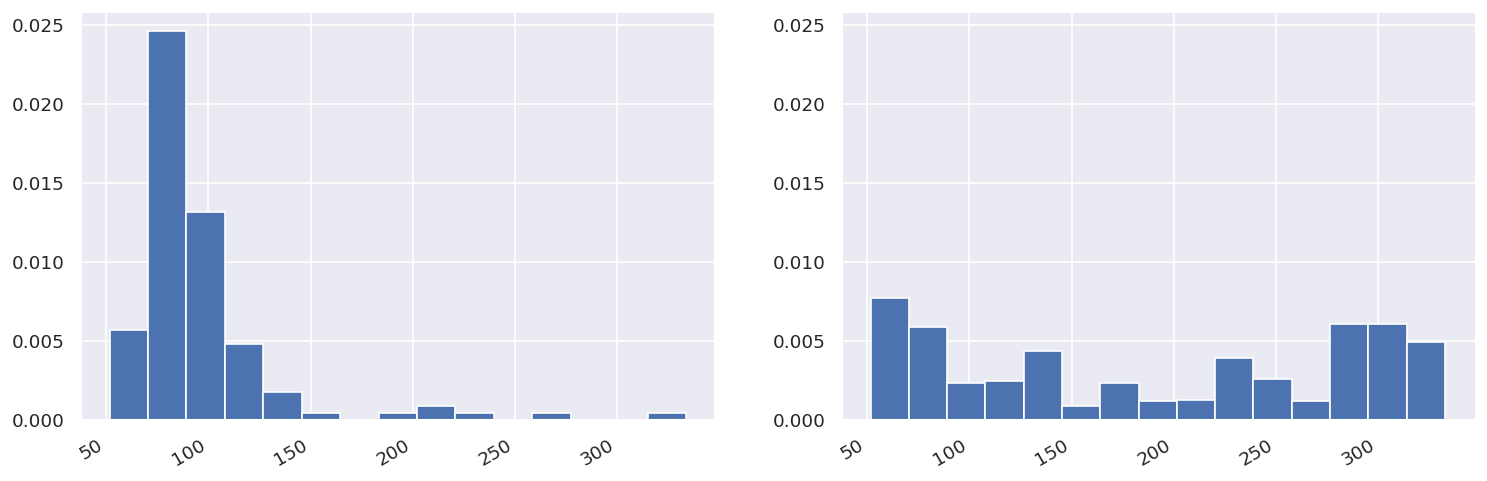

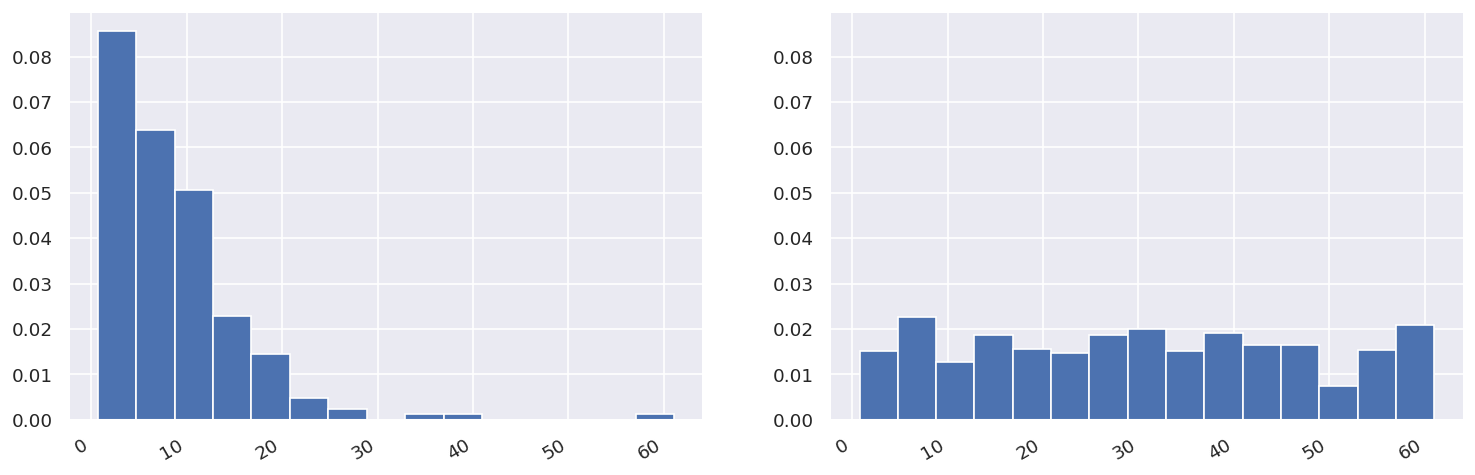

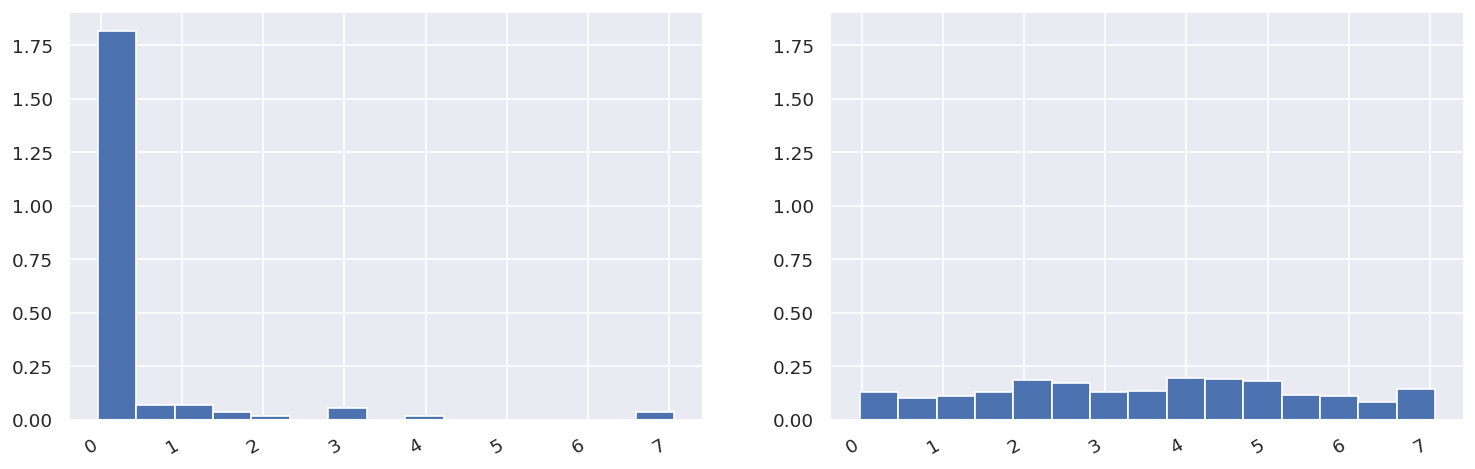

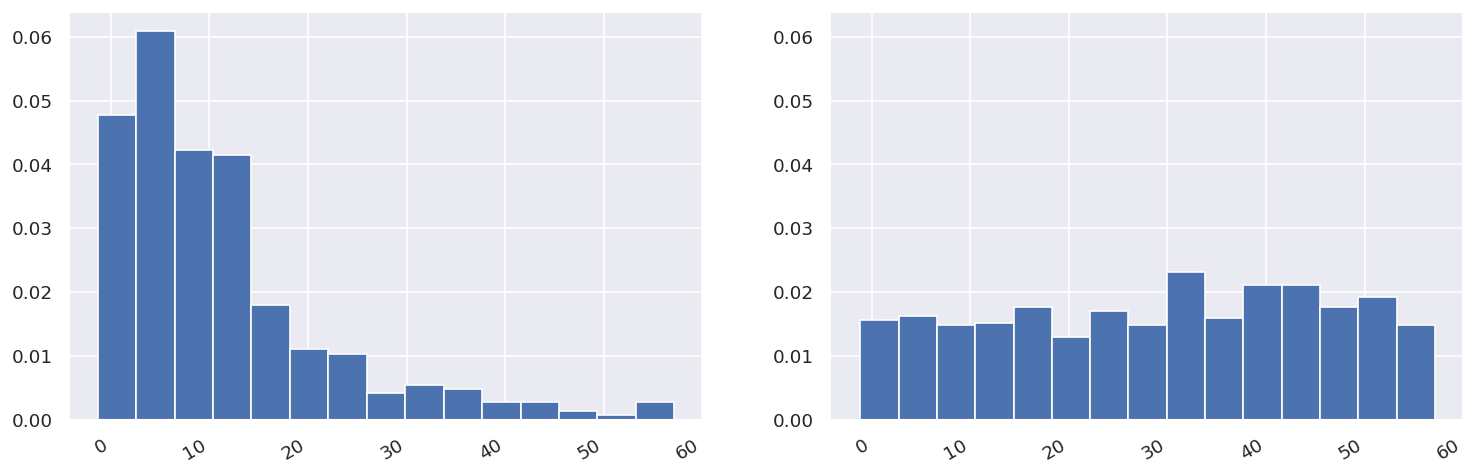

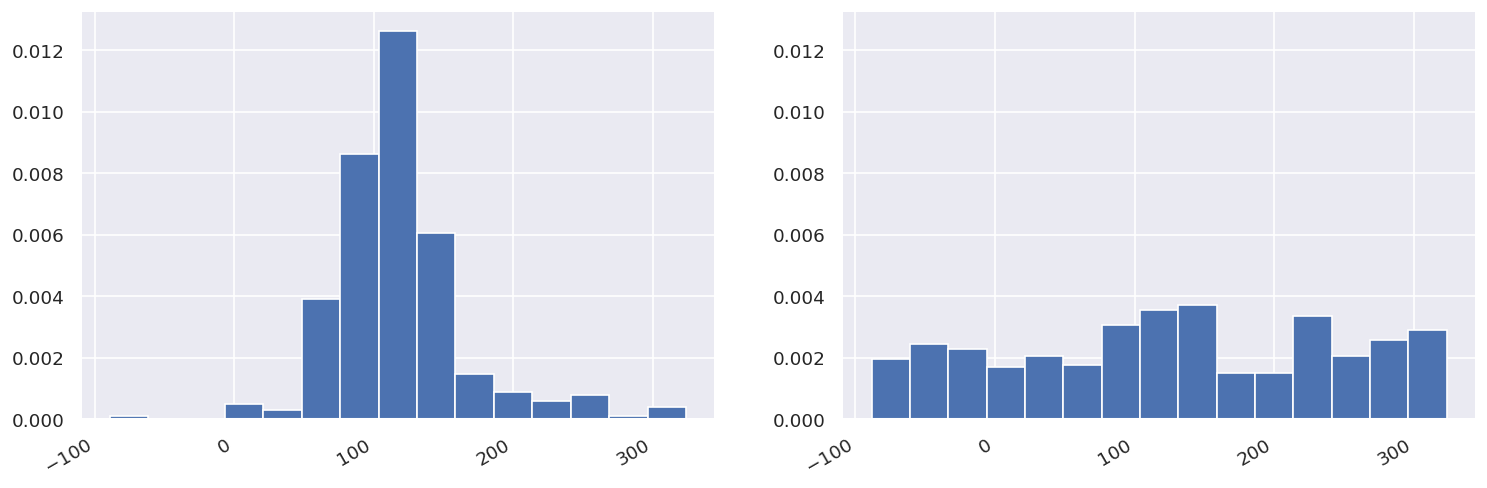

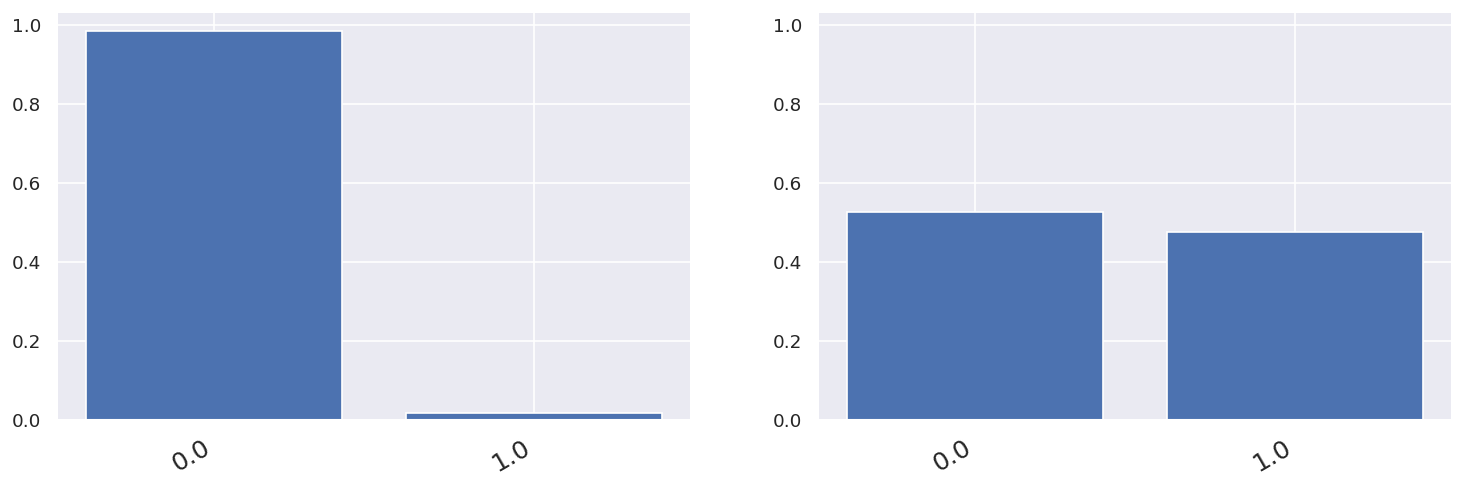

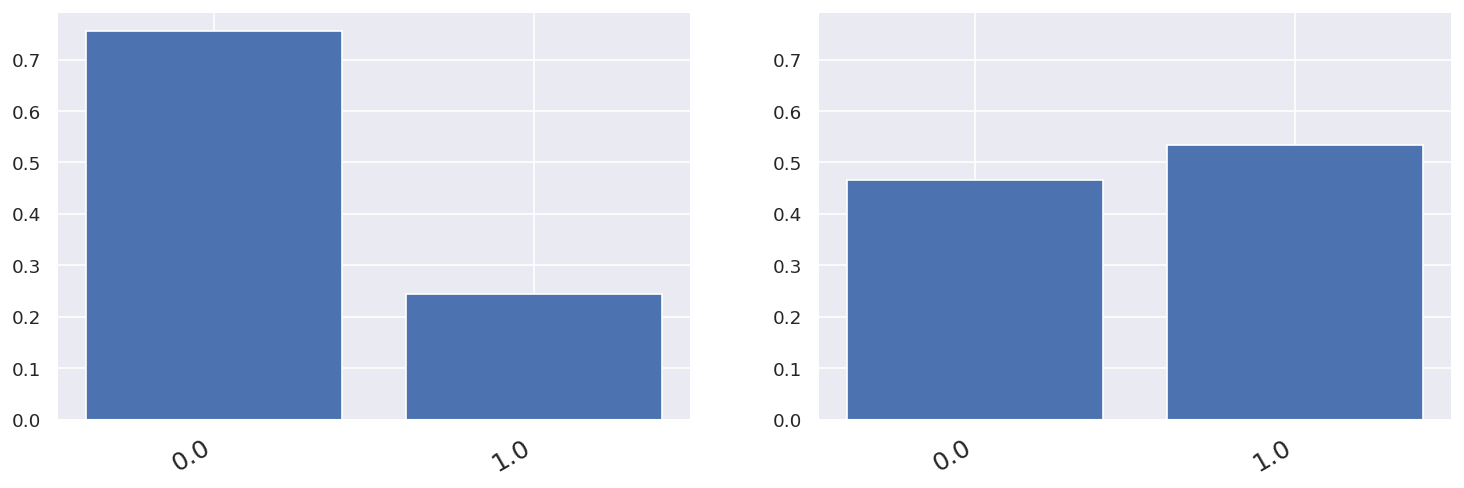

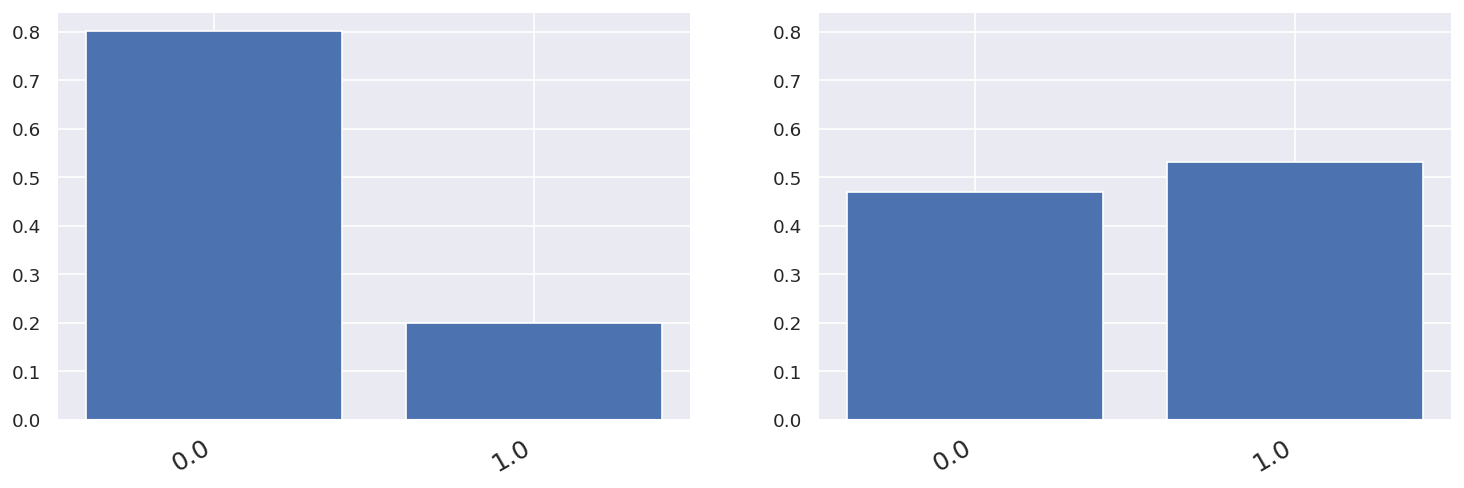

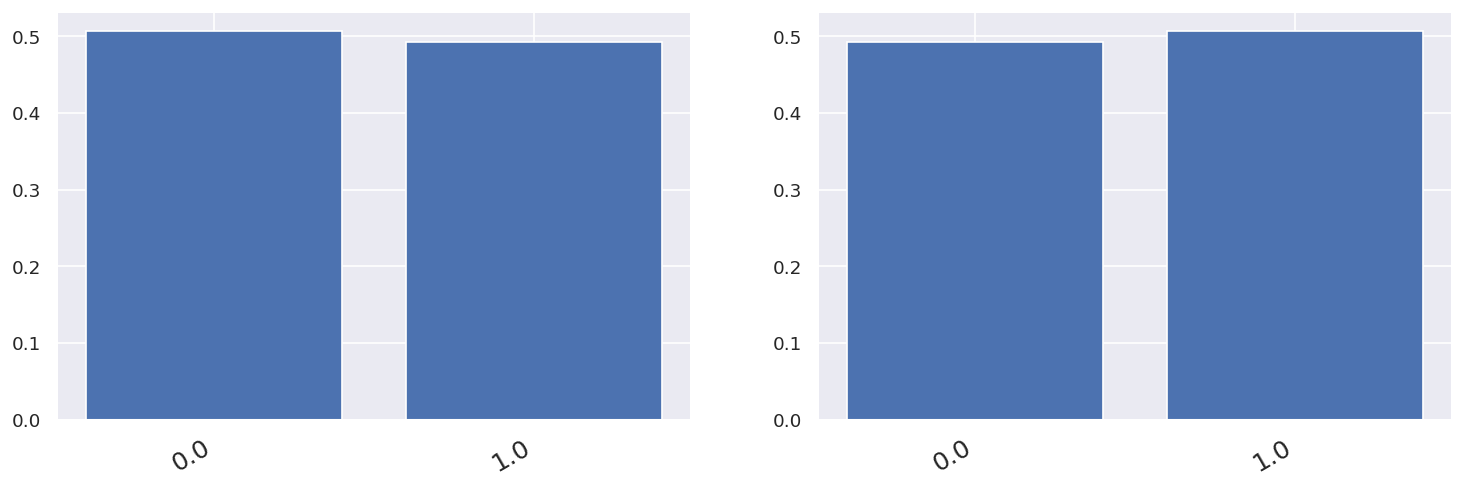

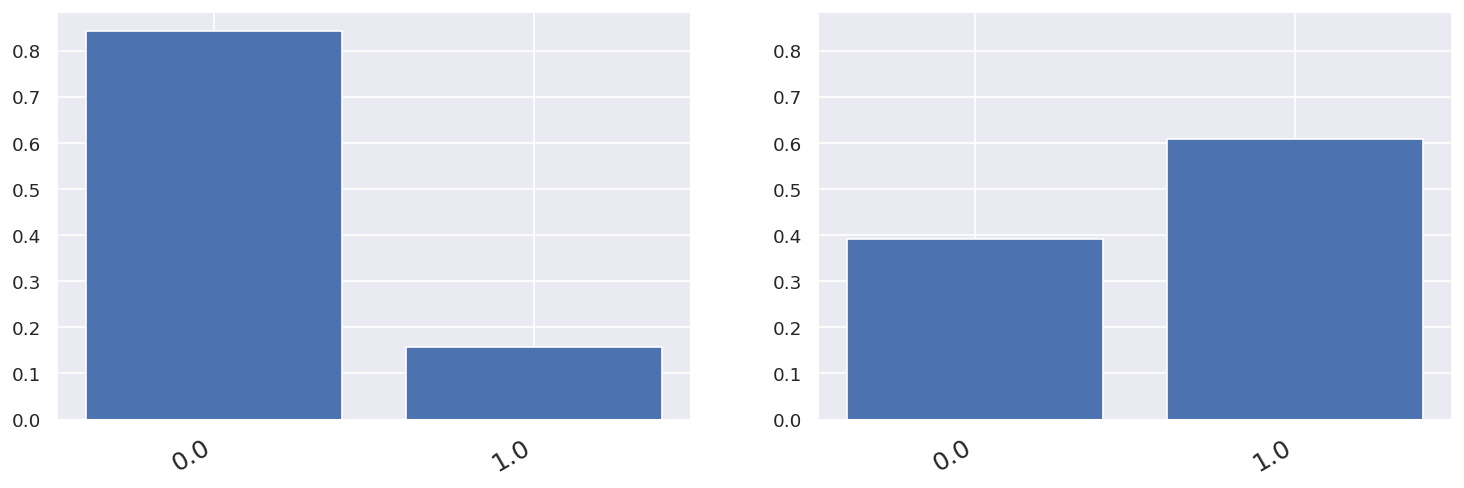

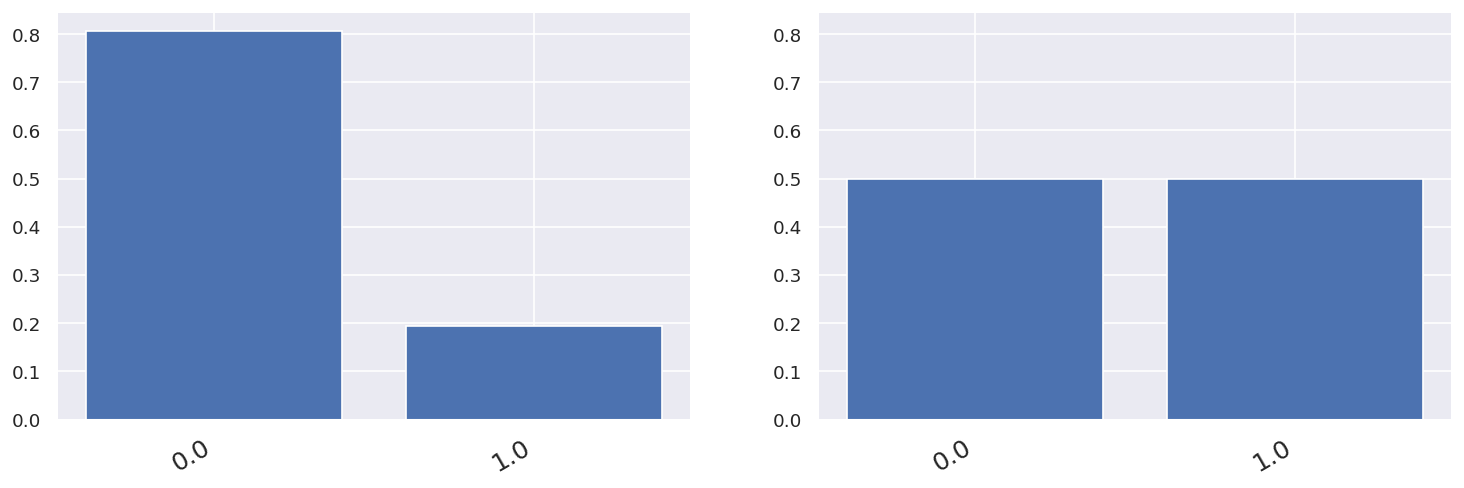

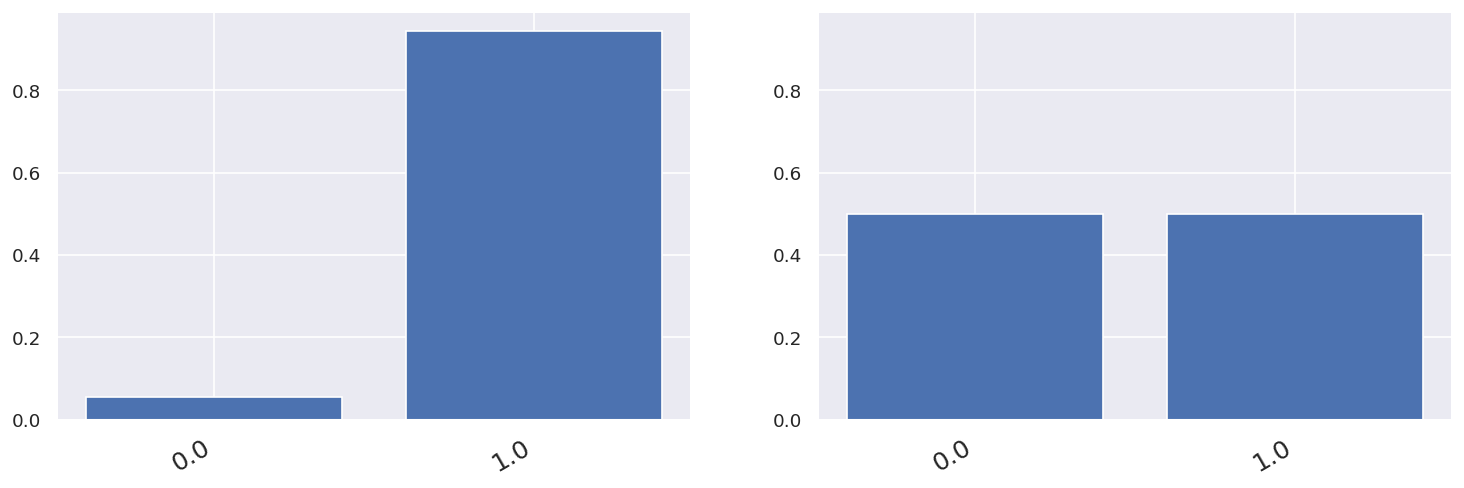

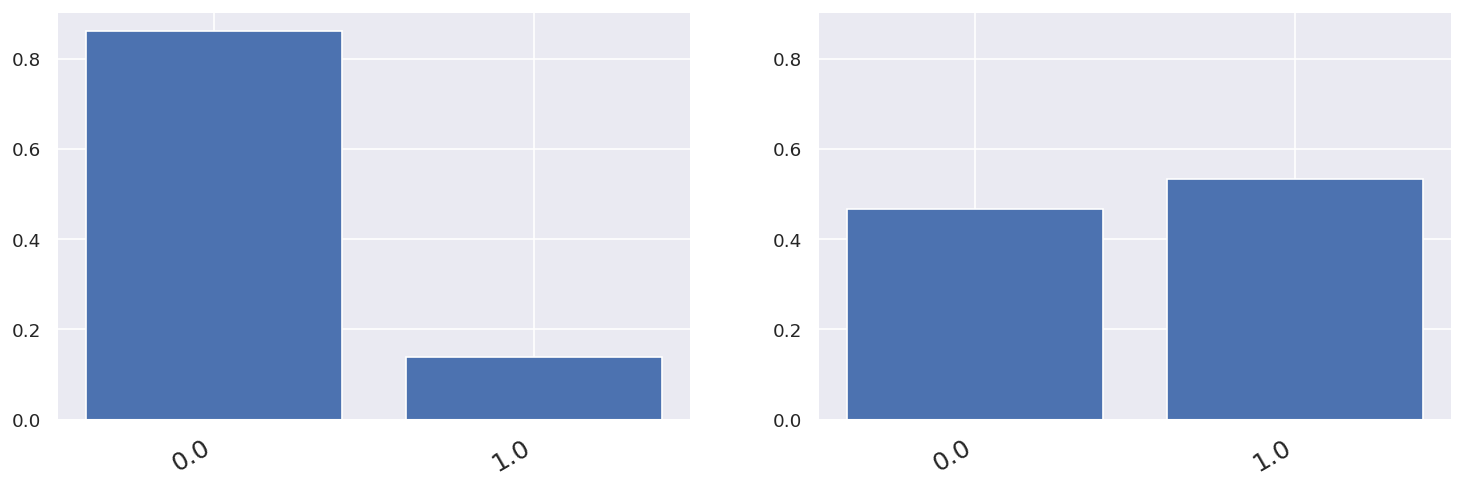

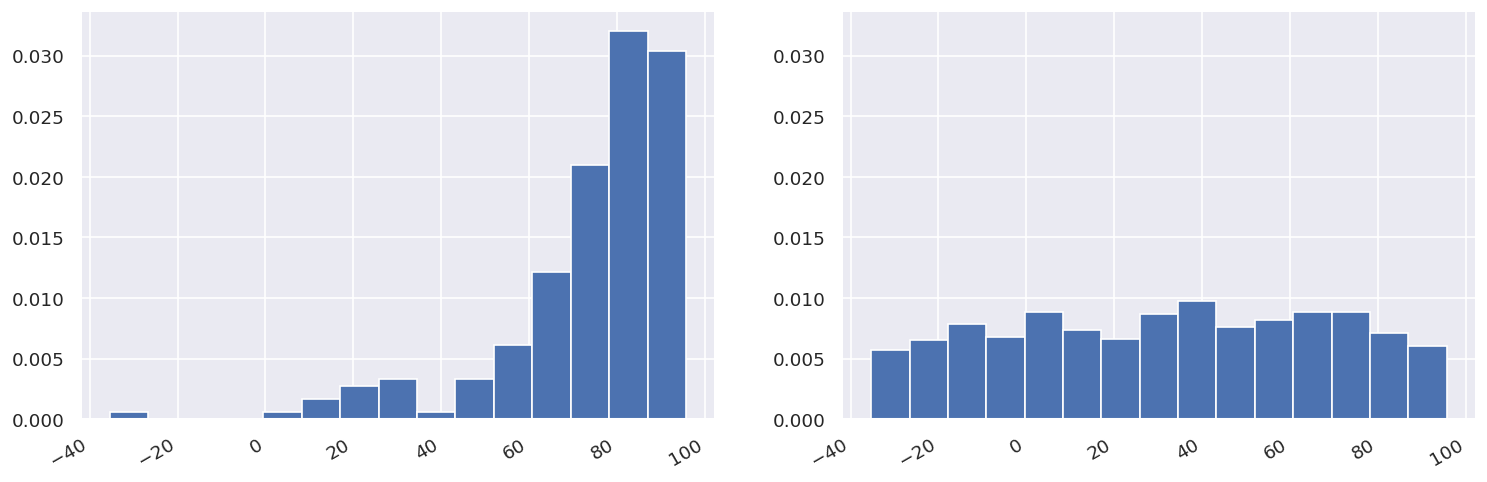

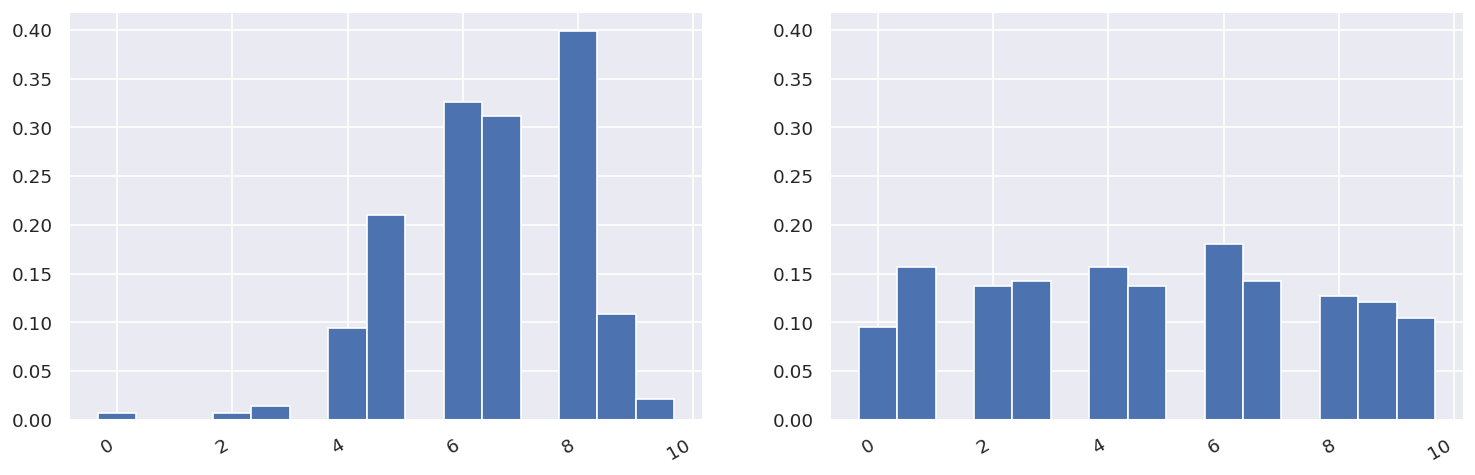

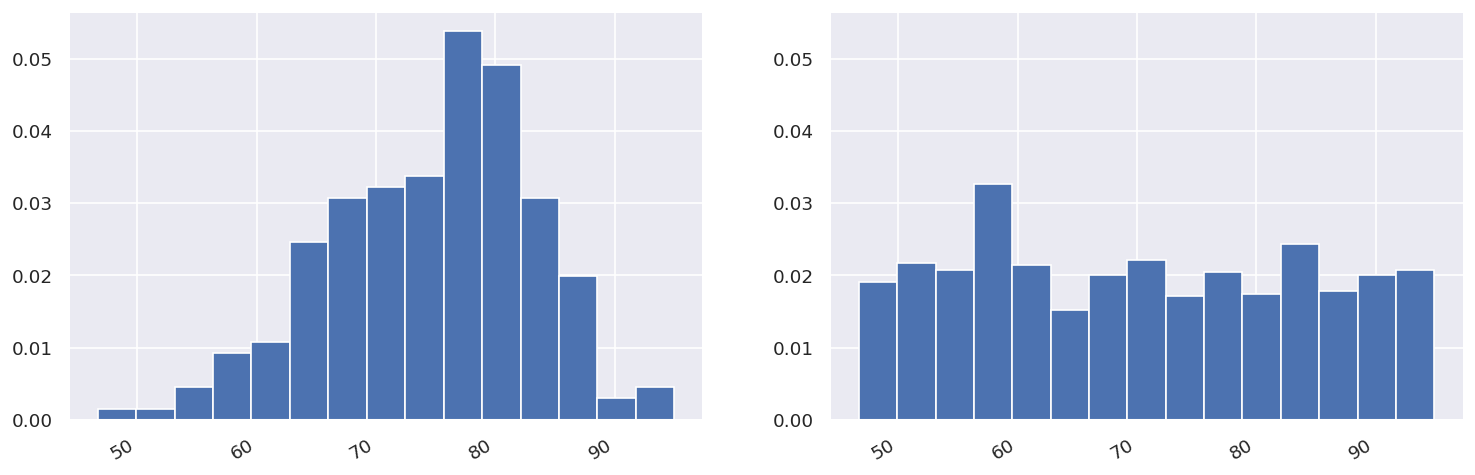

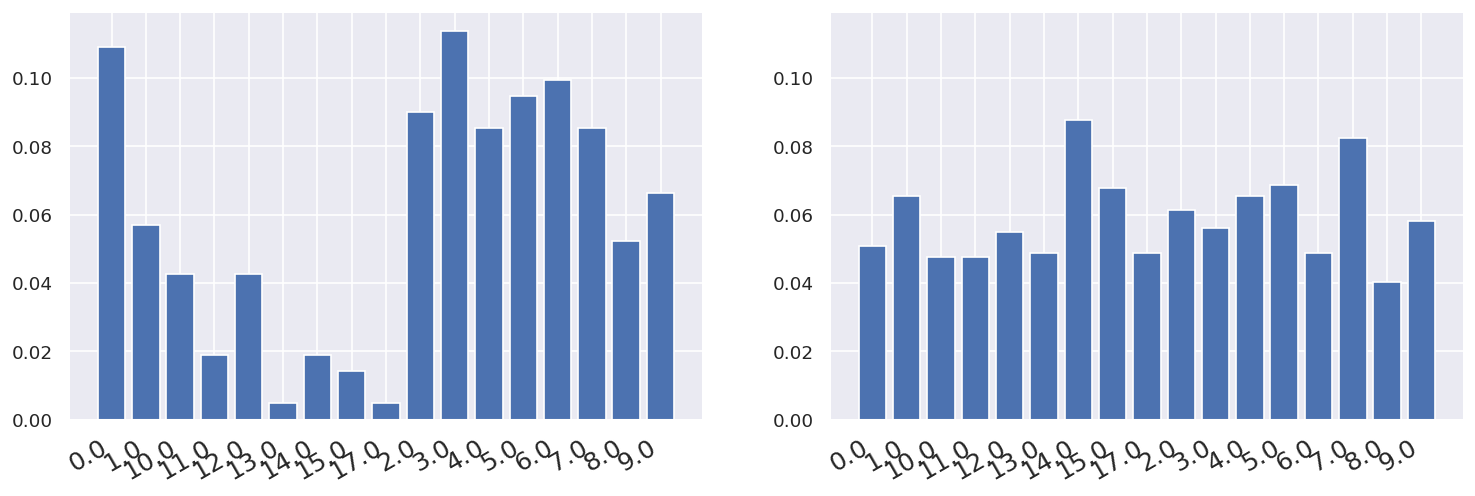

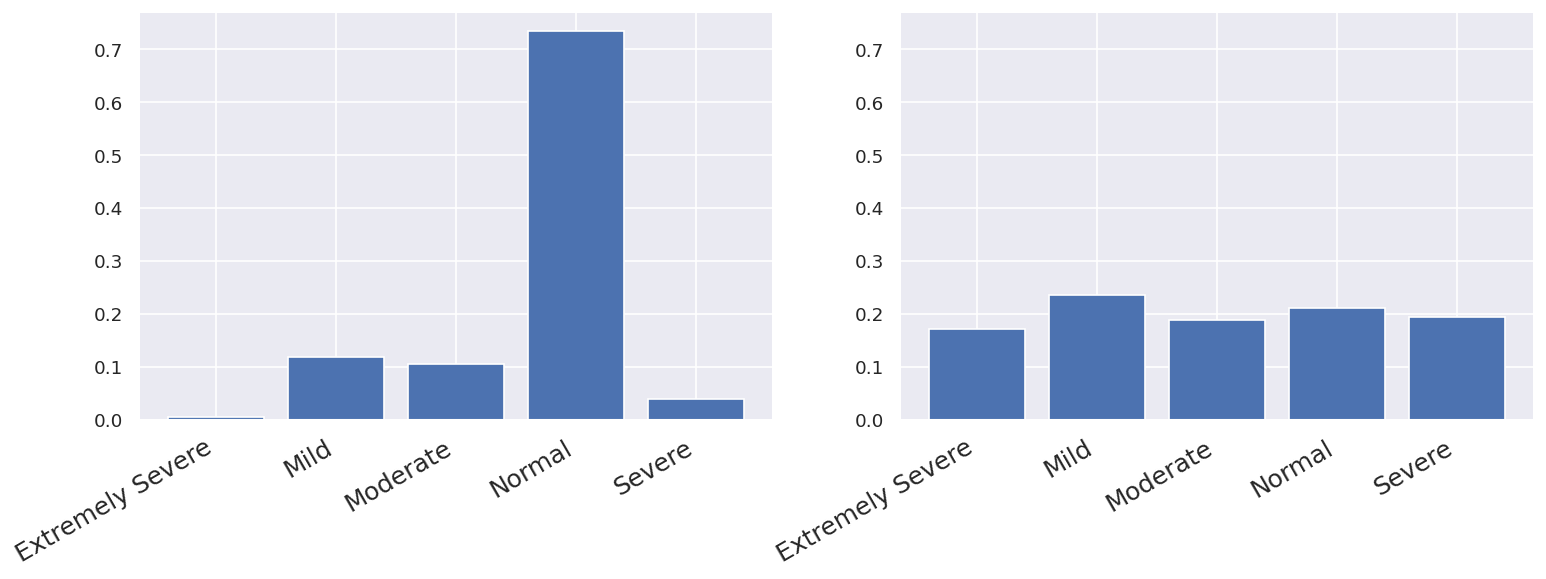

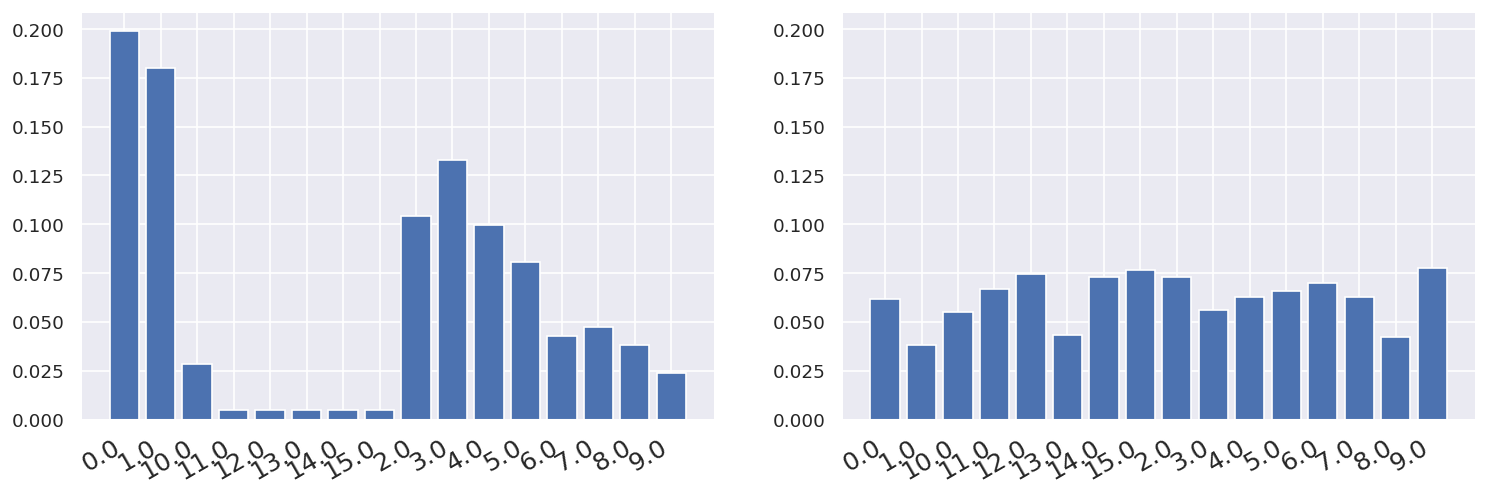

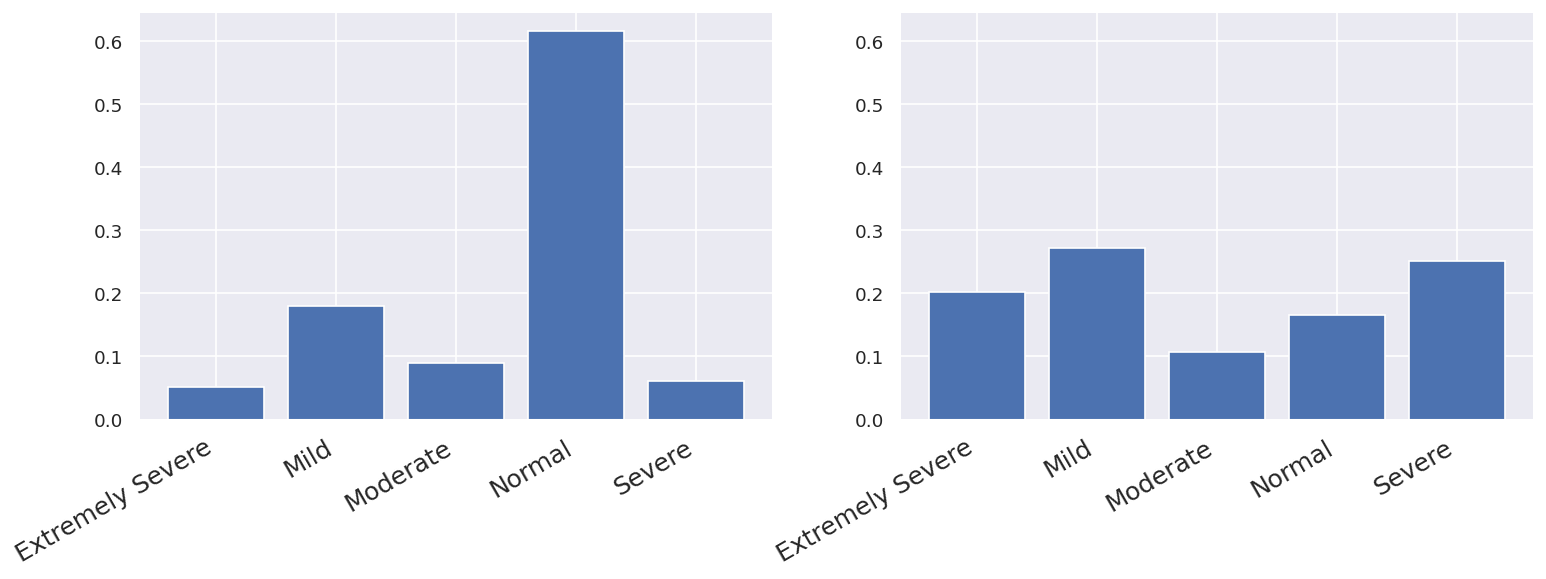

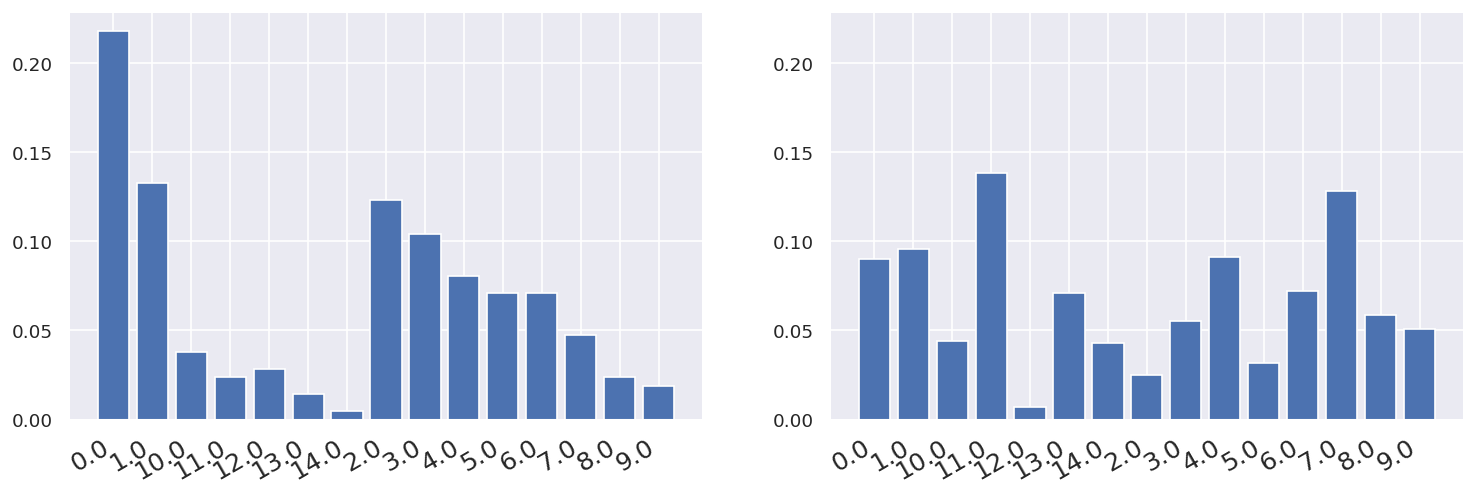

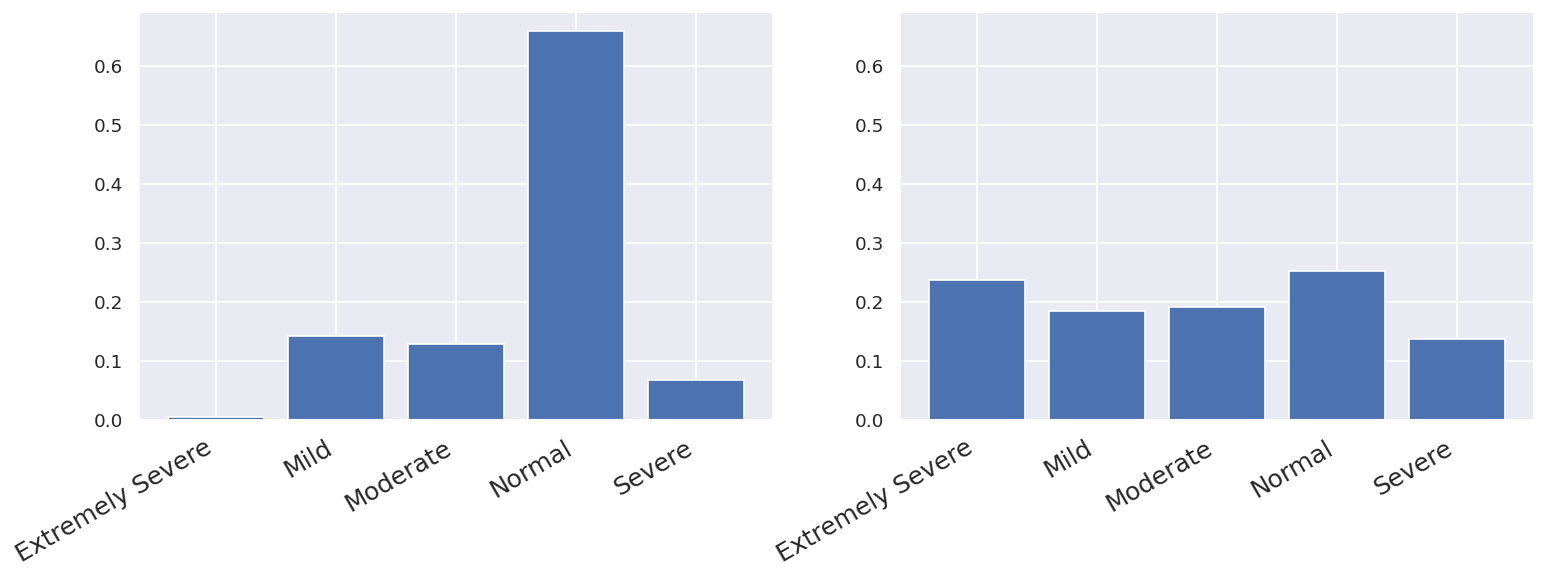

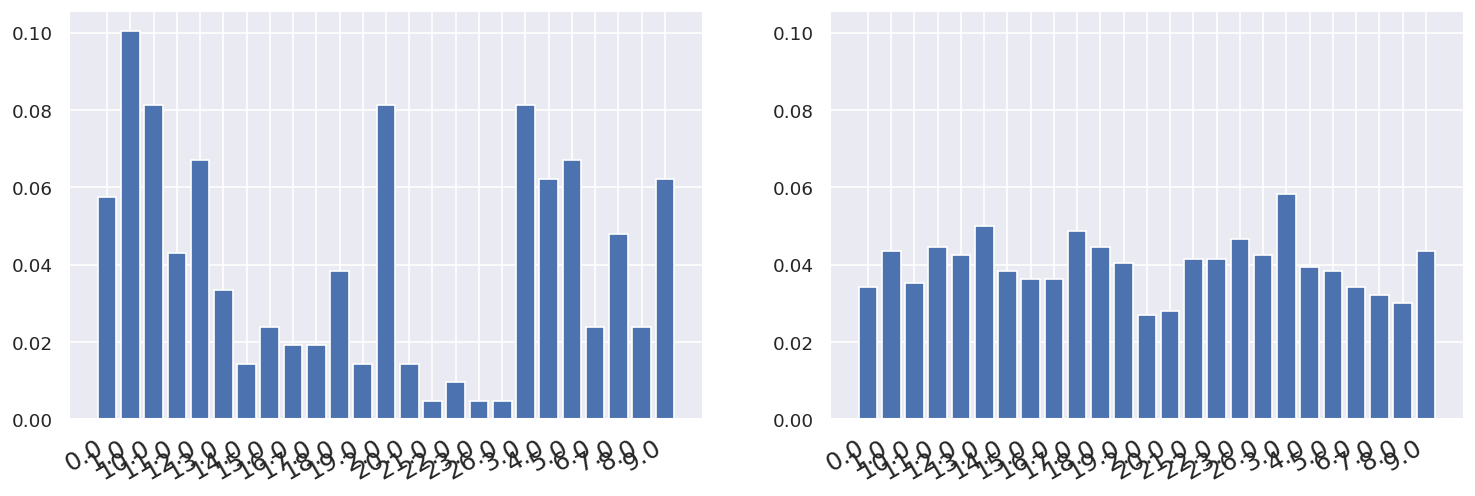

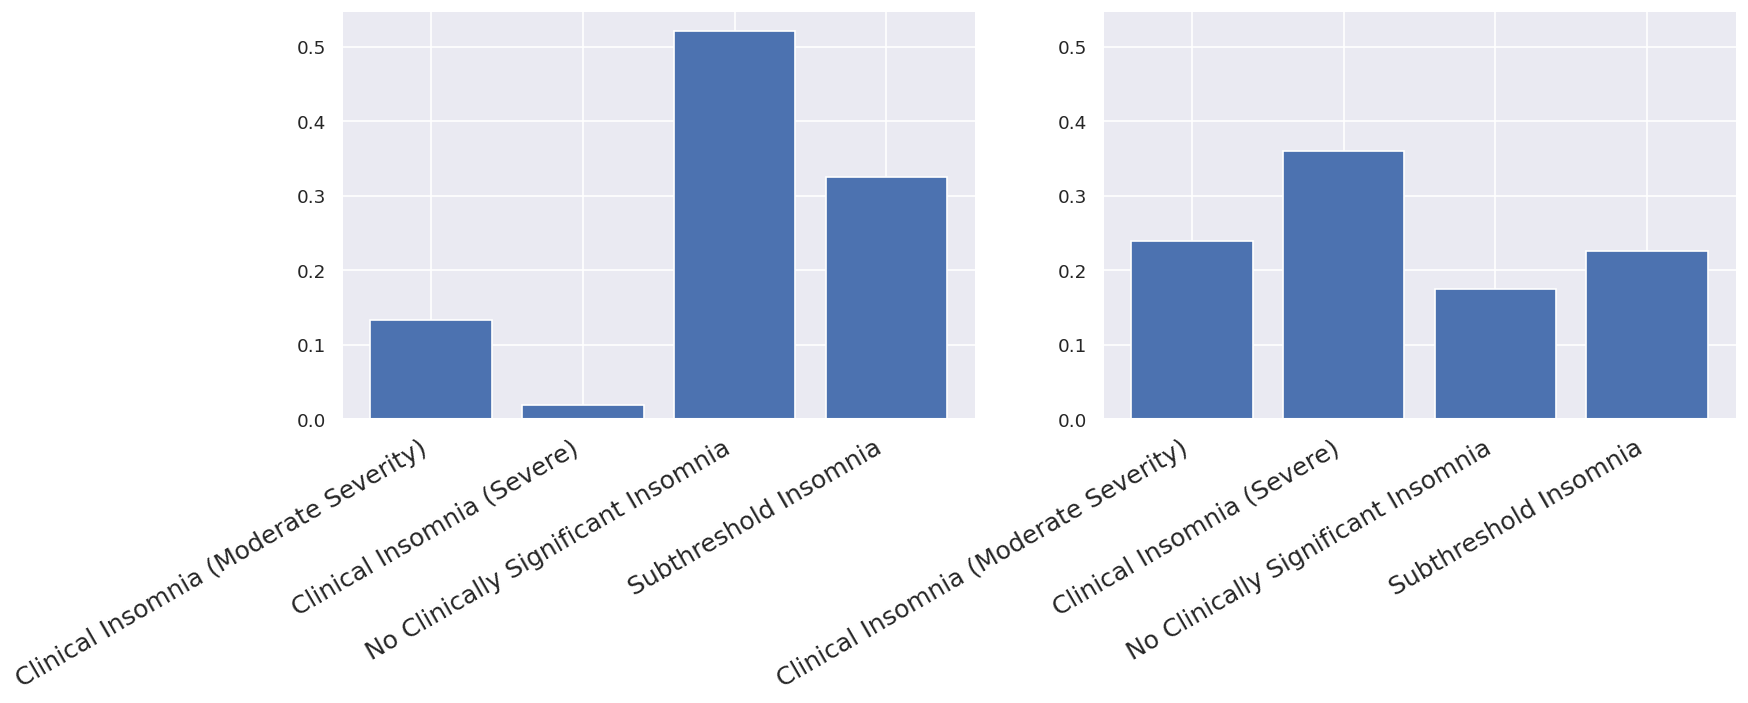

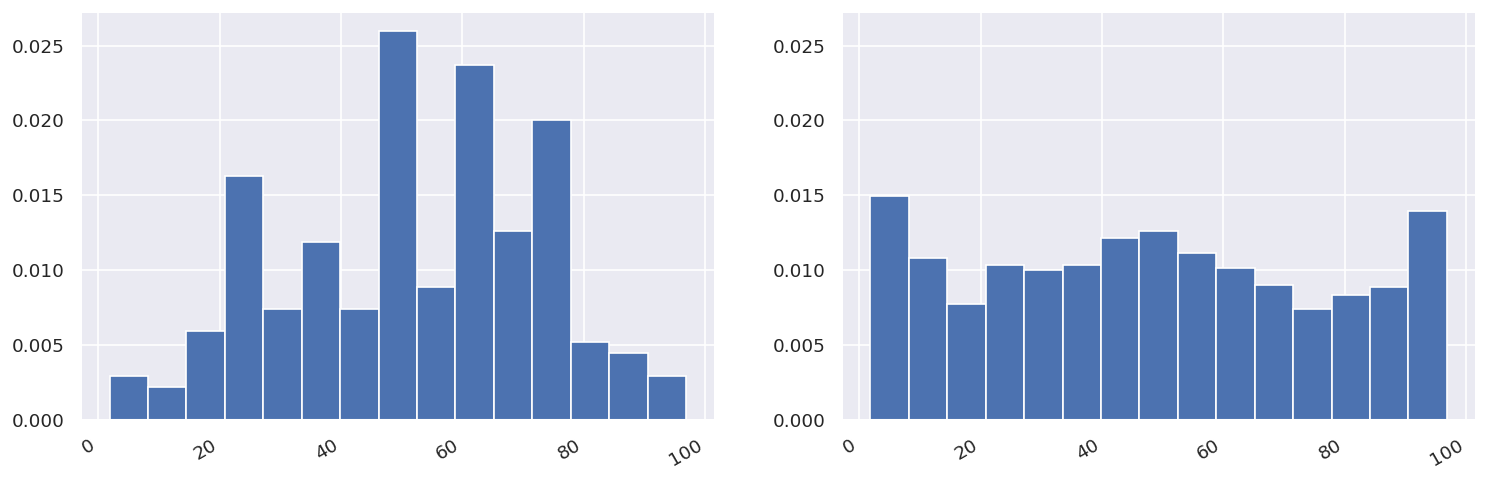

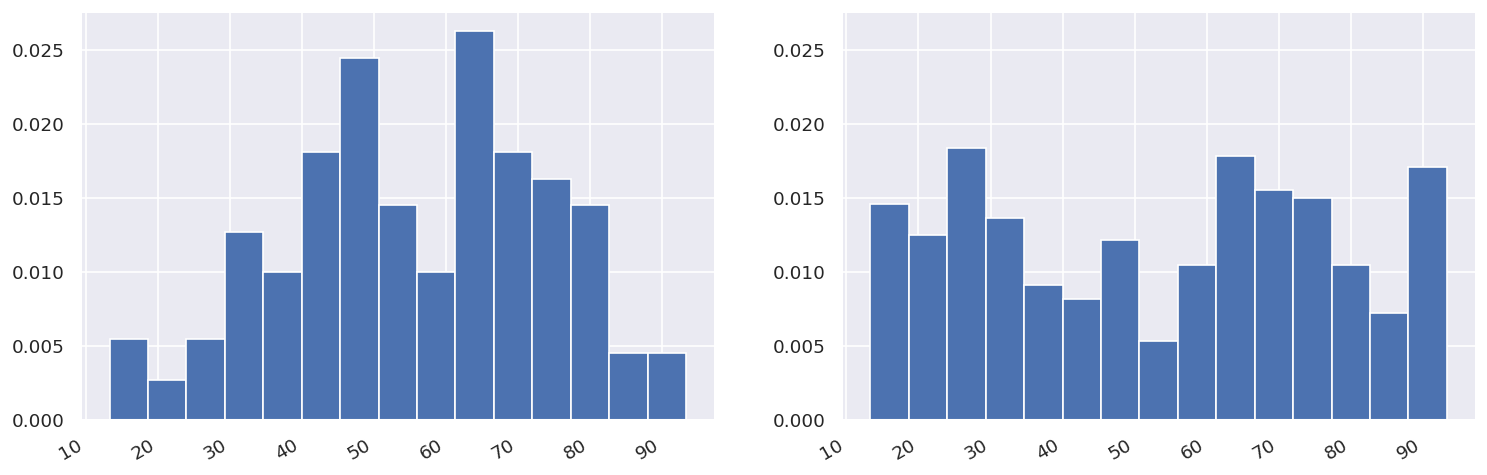

In [33]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

In [34]:
df['Charlson_Diabete'].value_counts()

0 = No                                 284
1 = Senza complicazioni                 44
2 = Con danneggiamento degli organi      8
Name: Charlson_Diabete, dtype: int64

Charlson_Diabete


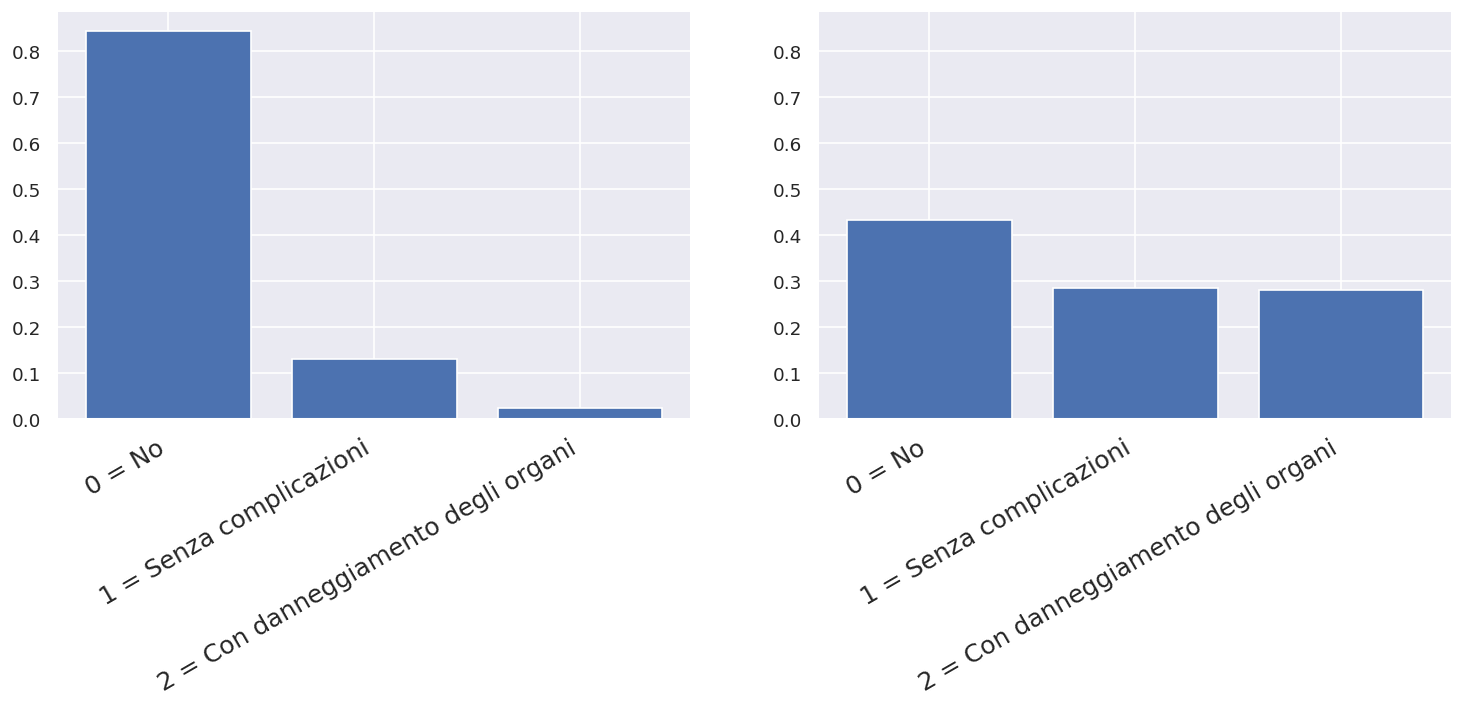

In [38]:
inspector.compare_histograms("Charlson_Diabete")

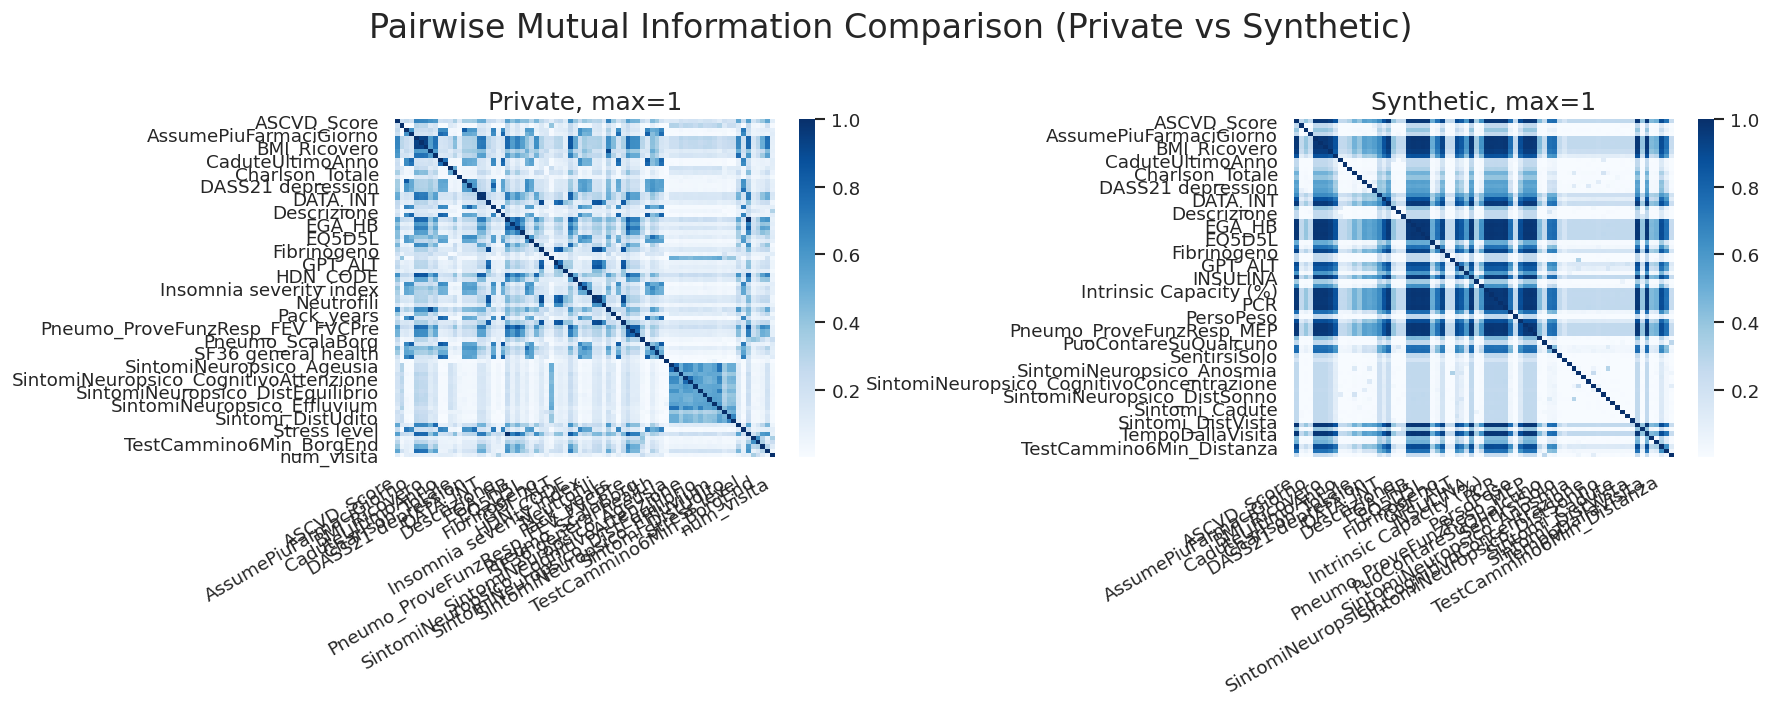

In [28]:
inspector.mutual_information_heatmap()

In [29]:
synthetic_df.head()

Sesso   ETA          DATA  ASCVD_Score  DATA_INT  num_visita  \
0     F  73.0  1.617667e+09    17.371291     266.0           0   
1     M  21.0  1.613085e+09    49.068801     347.0           0   
2     F  68.0  1.612082e+09     5.500355     228.0           1   
3     F  75.0  1.611291e+09    52.807861     387.0           2   
4     F  65.0  1.597173e+09     5.447111     401.0           0   

   Charlson_Totale                     Charlson_Diabete   Stifness    CAP  \
0              3.0  2 = Con danneggiamento degli organi        NaN  211.0   
1              8.0                               0 = No  16.615487  177.0   
2              7.0                                  NaN  46.831589    NaN   
3              3.0                               0 = No  11.425819  388.0   
4              NaN                                  NaN  12.175141  209.0   

   ...  DASS21 stress      Stress level  DASS21 anxiety     Anxiety level  \
0  ...            3.0          Moderate            10.0              Mild   
1  ...            7.0            Normal             2.0  Extremely Severe   
2  ...            3.0            Normal             5.0            Normal   
3  ...           14.0  Extremely Severe             2.0          Moderate   
4  ...            4.0  Extremely Severe             4.0  Extremely Severe   

   DASS21 depression  Depression level  Insomnia severity index  \
0                8.0               NaN                     12.0   
1                3.0  Extremely Severe                     19.0   
2                0.0  Extremely Severe                      NaN   
3                4.0  Extremely Severe                     18.0   
4               13.0  Extremely Severe                      9.0   

                            ISI level SF36 general health Resilience  
0               Subthreshold Insomnia                24.0       36.0  
1  No Clinically Significant Insomnia                61.0        NaN  
2  No Clinically Significant Insomnia                14.0       59.0  
3               Subthreshold Insomnia                51.0       93.0  
4          Clinical Insomnia (Severe)                37.0       29.0  

[5 rows x 78 columns]

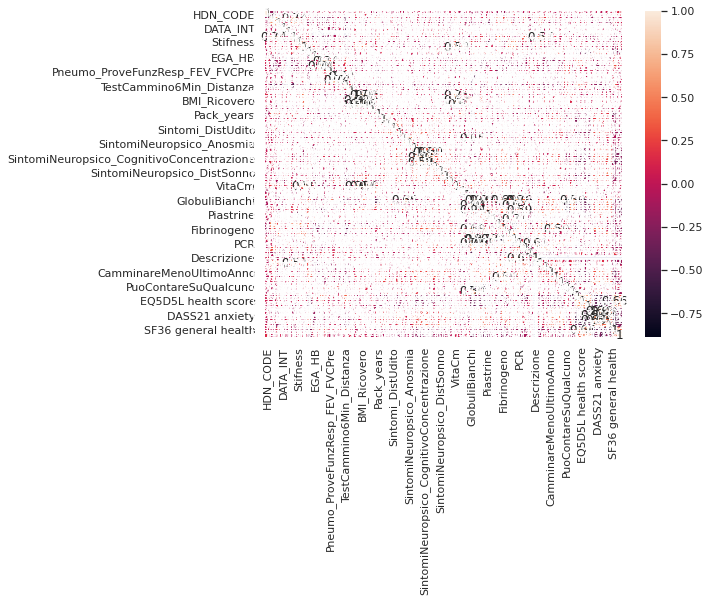

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()